**imports**

In [ ]:
from google.colab import files
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler,PolynomialFeatures
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

**data loading**

In [ ]:
coursework_dataset = files.upload()
coursework_dataset = pd.read_csv('COMP1801_Coursework_Dataset.csv')

Saving COMP1801_Coursework_Dataset.csv to COMP1801_Coursework_Dataset (2).csv


**data exploration**

In [ ]:
#displaying the data in an interactive table
display(coursework_dataset)

Lifespan partType microstructure  coolingRate  quenchTime  forgeTime  \
0     1469.17   Nozzle      equiGrain           13        3.84       6.47   
1     1793.64    Block    singleGrain           19        2.62       3.48   
2      700.60    Blade      equiGrain           28        0.76       1.34   
3     1082.10   Nozzle       colGrain            9        2.01       2.19   
4     1838.83    Blade       colGrain           16        4.13       3.87   
..        ...      ...            ...          ...         ...        ...   
995   1217.50    Block    singleGrain            5        1.91       8.55   
996    742.05    Block    singleGrain           10        0.67       7.99   
997   1448.26   Nozzle      equiGrain           17        3.12       7.61   
998   1099.10    Valve       colGrain           23        4.48       2.39   
999   1086.82    Valve       colGrain           10        3.52       2.29   

     HeatTreatTime  Nickel%  Iron%  Cobalt%  Chromium%  smallDefects  \
0            46.87    65.73  16.52    16.82       0.93            10   
1            44.70    54.22  35.38     6.14       4.26            19   
2             9.54    51.83  35.95     8.81       3.41            35   
3            20.29    57.03  23.33    16.86       2.78             0   
4            16.13    59.62  27.37    11.45       1.56            10   
..             ...      ...    ...      ...        ...           ...   
995          34.76    68.11  20.73     7.15       4.01             0   
996          46.21    51.25  32.12    12.23       4.40             1   
997          59.87    54.09  33.20     9.31       3.40            16   
998          17.72    50.32  31.92    13.01       4.75            11   
999          40.10    66.75  12.08    17.89       3.28             9   

     largeDefects  sliverDefects seedLocation    castType  
0               0              0       Bottom         Die  
1               0              0       Bottom  Investment  
2               3              0       Bottom  Investment  
3               1              0          Top  Continuous  
4               0              0          Top         Die  
..            ...            ...          ...         ...  
995             0              0       Bottom  Investment  
996             0              0       Bottom  Investment  
997             1              0       Bottom  Investment  
998             0              0          Top  Continuous  
999             3              0          Top  Continuous  

[1000 rows x 16 columns]

In [ ]:
print("The shape of the dataset is : " + str(coursework_dataset.shape))
print()
print("Column Names of the dataset are : ")
print()
print(coursework_dataset.columns)
print()
print("The data type of all the columns are : ")
print()
print(coursework_dataset.dtypes)

The shape of the dataset is : (1000, 16)

Column Names of the dataset are : 

Index(['Lifespan', 'partType', 'microstructure', 'coolingRate', 'quenchTime',
       'forgeTime', 'HeatTreatTime', 'Nickel%', 'Iron%', 'Cobalt%',
       'Chromium%', 'smallDefects', 'largeDefects', 'sliverDefects',
       'seedLocation', 'castType'],
      dtype='object')

The data type of all the columns are : 

Lifespan          float64
partType           object
microstructure     object
coolingRate         int64
quenchTime        float64
forgeTime         float64
HeatTreatTime     float64
Nickel%           float64
Iron%             float64
Cobalt%           float64
Chromium%         float64
smallDefects        int64
largeDefects        int64
sliverDefects       int64
seedLocation       object
castType           object
dtype: object


In [ ]:
print("The first 5 observations are : ")
print(coursework_dataset.head())
print()
print("The last 5 observations are : ")
print(coursework_dataset.tail())

The first 5 observations are : 
   Lifespan partType microstructure  coolingRate  quenchTime  forgeTime  \
0   1469.17   Nozzle      equiGrain           13        3.84       6.47   
1   1793.64    Block    singleGrain           19        2.62       3.48   
2    700.60    Blade      equiGrain           28        0.76       1.34   
3   1082.10   Nozzle       colGrain            9        2.01       2.19   
4   1838.83    Blade       colGrain           16        4.13       3.87   

   HeatTreatTime  Nickel%  Iron%  Cobalt%  Chromium%  smallDefects  \
0          46.87    65.73  16.52    16.82       0.93            10   
1          44.70    54.22  35.38     6.14       4.26            19   
2           9.54    51.83  35.95     8.81       3.41            35   
3          20.29    57.03  23.33    16.86       2.78             0   
4          16.13    59.62  27.37    11.45       1.56            10   

   largeDefects  sliverDefects seedLocation    castType  
0             0              0       B

statistical summary of the data

In [ ]:
coursework_dataset.describe()

Lifespan  coolingRate   quenchTime    forgeTime  HeatTreatTime  \
count  1000.000000  1000.000000  1000.000000  1000.000000    1000.000000   
mean   1298.556320    17.639000     2.764230     5.464600      30.194510   
std     340.071434     7.491783     1.316979     2.604513      16.889415   
min     417.990000     5.000000     0.500000     1.030000       1.030000   
25%    1047.257500    11.000000     1.640000     3.170000      16.185000   
50%    1266.040000    18.000000     2.755000     5.475000      29.365000   
75%    1563.050000    24.000000     3.970000     7.740000      44.955000   
max    2134.530000    30.000000     4.990000    10.000000      59.910000   

           Nickel%        Iron%      Cobalt%    Chromium%  smallDefects  \
count  1000.000000  1000.000000  1000.000000  1000.000000   1000.000000   
mean     60.243080    24.553580    12.434690     2.768650     17.311000   
std       5.790475     7.371737     4.333197     1.326496     12.268365   
min      50.020000     6.660000     5.020000     0.510000      0.000000   
25%      55.287500    19.387500     8.597500     1.590000      7.000000   
50%      60.615000    24.690000    12.585000     2.865000     18.000000   
75%      65.220000    29.882500    16.080000     3.922500     26.000000   
max      69.950000    43.650000    19.990000     4.990000     61.000000   

       largeDefects  sliverDefects  
count   1000.000000    1000.000000  
mean       0.550000       0.292000  
std        1.163982       1.199239  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        0.000000       0.000000  
max        4.000000       8.000000

In [ ]:
coursework_dataset.describe(include=['object'])

partType microstructure seedLocation castType
count      1000           1000         1000     1000
unique        4              3            2        3
top       Valve    singleGrain          Top      Die
freq        265            343          503      366

In [ ]:
selected_columns = [
'Lifespan',
'coolingRate',
'quenchTime',
'forgeTime',
'HeatTreatTime',
'Nickel%',
'Iron%',
'Cobalt%',
'Chromium%',
'smallDefects',
'largeDefects',
'sliverDefects']

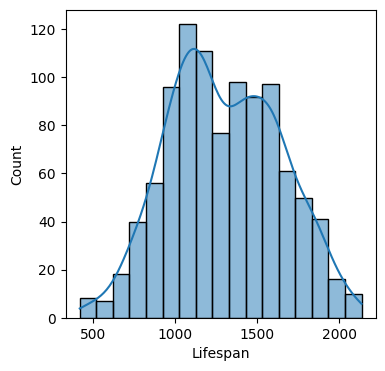

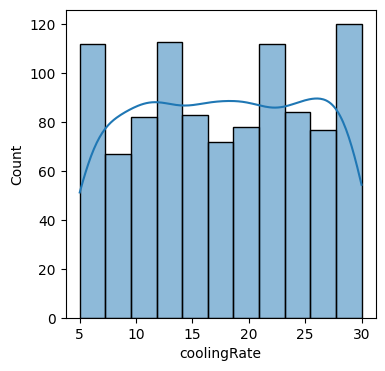

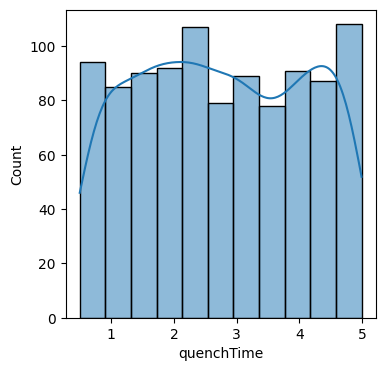

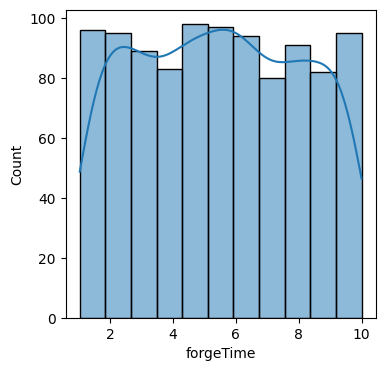

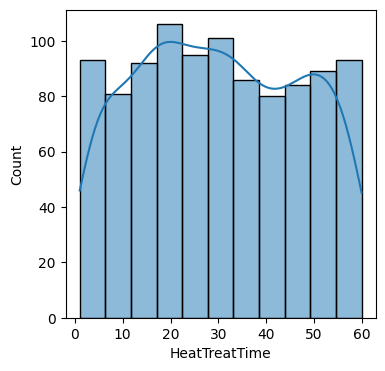

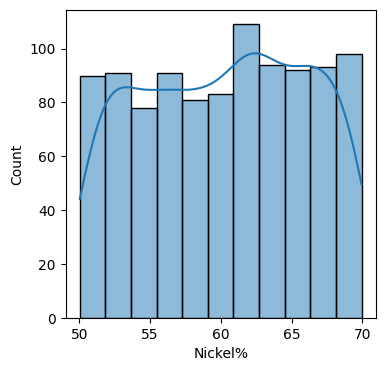

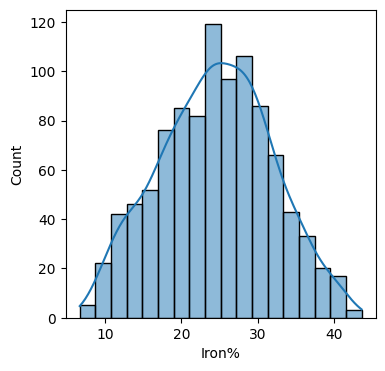

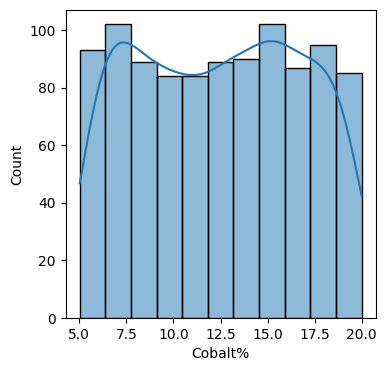

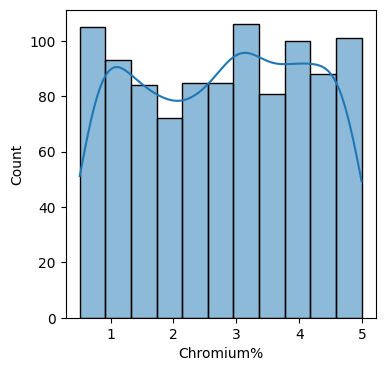

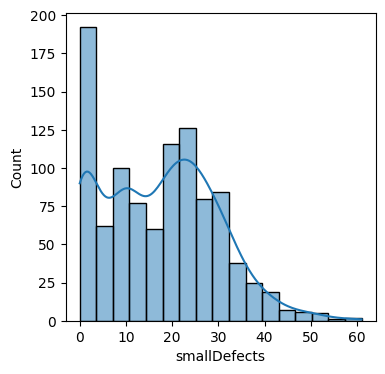

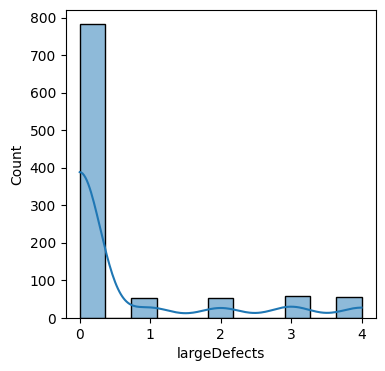

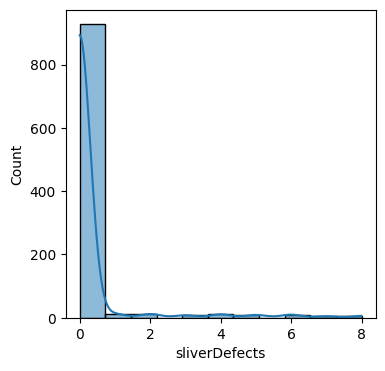

In [ ]:
for column in selected_columns:
  plt.figure(figsize=(4, 4))
  sns.histplot(coursework_dataset[column],kde=True)
  plt.show()

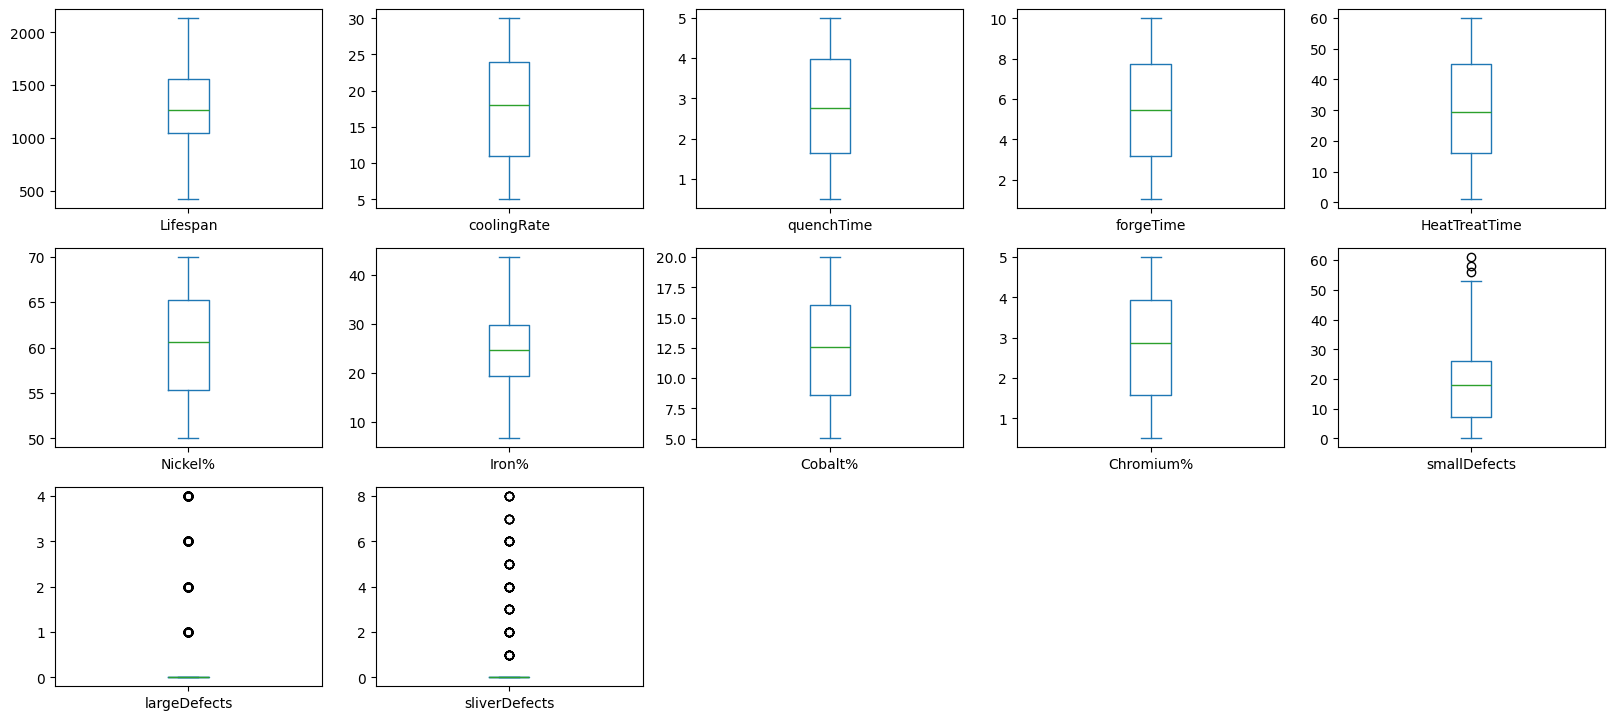

In [ ]:
coursework_dataset.plot(kind='box',subplots=True,layout=(5,5),figsize=(20,15))
plt.show()

Categorical data exploration

In [ ]:
print("The Unique Values in the column part type")
coursework_dataset['partType'].unique()

The Unique Values in the column part type


array(['Nozzle', 'Block', 'Blade', 'Valve'], dtype=object)

In [ ]:
print("The Unique Values in the column micro structure")
coursework_dataset['microstructure'].unique()

The Unique Values in the column micro structure


array(['equiGrain', 'singleGrain', 'colGrain'], dtype=object)

In [ ]:
print("The Unique Values in the column seed location")
coursework_dataset['seedLocation'].unique()

The Unique Values in the column seed location


array(['Bottom', 'Top'], dtype=object)

In [ ]:
print("The Unique Values in the column micro cast type")
coursework_dataset['castType'].unique()

The Unique Values in the column micro cast type


array(['Die', 'Investment', 'Continuous'], dtype=object)

In [ ]:
#creating a copy of the original dataset to encode the categorical features
coursework_dataset_copy = coursework_dataset.copy()
#creating one hot encoder object
oneHotEncoderObject = OneHotEncoder(sparse_output=False)
#features to be encoded
categorical_features = ['partType','microstructure','seedLocation','castType']
EncodedValues = oneHotEncoderObject.fit_transform(coursework_dataset_copy[categorical_features])
#creating a datafram with the encoded categorical features
encoded_dataframe = pd.DataFrame(EncodedValues, columns = oneHotEncoderObject.get_feature_names_out(categorical_features))
#concatenating the encoded dataframe with the actual dataframe
coursework_dataset_copy = pd.concat([coursework_dataset_copy,encoded_dataframe], axis=1)
#dropping the original categorical feature columns
coursework_dataset_copy = coursework_dataset_copy.drop(categorical_features, axis=1)

In [ ]:
display(coursework_dataset_copy)

Lifespan  coolingRate  quenchTime  forgeTime  HeatTreatTime  Nickel%  \
0     1469.17           13        3.84       6.47          46.87    65.73   
1     1793.64           19        2.62       3.48          44.70    54.22   
2      700.60           28        0.76       1.34           9.54    51.83   
3     1082.10            9        2.01       2.19          20.29    57.03   
4     1838.83           16        4.13       3.87          16.13    59.62   
..        ...          ...         ...        ...            ...      ...   
995   1217.50            5        1.91       8.55          34.76    68.11   
996    742.05           10        0.67       7.99          46.21    51.25   
997   1448.26           17        3.12       7.61          59.87    54.09   
998   1099.10           23        4.48       2.39          17.72    50.32   
999   1086.82           10        3.52       2.29          40.10    66.75   

     Iron%  Cobalt%  Chromium%  smallDefects  ...  partType_Nozzle  \
0    16.52    16.82       0.93            10  ...              1.0   
1    35.38     6.14       4.26            19  ...              0.0   
2    35.95     8.81       3.41            35  ...              0.0   
3    23.33    16.86       2.78             0  ...              1.0   
4    27.37    11.45       1.56            10  ...              0.0   
..     ...      ...        ...           ...  ...              ...   
995  20.73     7.15       4.01             0  ...              0.0   
996  32.12    12.23       4.40             1  ...              0.0   
997  33.20     9.31       3.40            16  ...              1.0   
998  31.92    13.01       4.75            11  ...              0.0   
999  12.08    17.89       3.28             9  ...              0.0   

     partType_Valve  microstructure_colGrain  microstructure_equiGrain  \
0               0.0                      0.0                       1.0   
1               0.0                      0.0                       0.0   
2               0.0                      0.0                       1.0   
3               0.0                      1.0                       0.0   
4               0.0                      1.0                       0.0   
..              ...                      ...                       ...   
995             0.0                      0.0                       0.0   
996             0.0                      0.0                       0.0   
997             0.0                      0.0                       1.0   
998             1.0                      1.0                       0.0   
999             1.0                      1.0                       0.0   

     microstructure_singleGrain  seedLocation_Bottom  seedLocation_Top  \
0                           0.0                  1.0               0.0   
1                           1.0                  1.0               0.0   
2                           0.0                  1.0               0.0   
3                           0.0                  0.0               1.0   
4                           0.0                  0.0               1.0   
..                          ...                  ...               ...   
995                         1.0                  1.0               0.0   
996                         1.0                  1.0               0.0   
997                         0.0                  1.0               0.0   
998                         0.0                  0.0               1.0   
999                         0.0                  0.0               1.0   

     castType_Continuous  castType_Die  castType_Investment  
0                    0.0           1.0                  0.0  
1                    0.0           0.0                  1.0  
2                    0.0           0.0                  1.0  
3                    1.0           0.0                  0.0  
4                    0.0           1.0                  0.0  
..                   ...           ...                  ...  
995                  0.0   

In [ ]:
coursework_dataset_copy.describe()

Lifespan  coolingRate   quenchTime    forgeTime  HeatTreatTime  \
count  1000.000000  1000.000000  1000.000000  1000.000000    1000.000000   
mean   1298.556320    17.639000     2.764230     5.464600      30.194510   
std     340.071434     7.491783     1.316979     2.604513      16.889415   
min     417.990000     5.000000     0.500000     1.030000       1.030000   
25%    1047.257500    11.000000     1.640000     3.170000      16.185000   
50%    1266.040000    18.000000     2.755000     5.475000      29.365000   
75%    1563.050000    24.000000     3.970000     7.740000      44.955000   
max    2134.530000    30.000000     4.990000    10.000000      59.910000   

           Nickel%        Iron%      Cobalt%    Chromium%  smallDefects  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000   1000.000000  ...   
mean     60.243080    24.553580    12.434690     2.768650     17.311000  ...   
std       5.790475     7.371737     4.333197     1.326496     12.268365  ...   
min      50.020000     6.660000     5.020000     0.510000      0.000000  ...   
25%      55.287500    19.387500     8.597500     1.590000      7.000000  ...   
50%      60.615000    24.690000    12.585000     2.865000     18.000000  ...   
75%      65.220000    29.882500    16.080000     3.922500     26.000000  ...   
max      69.950000    43.650000    19.990000     4.990000     61.000000  ...   

       partType_Nozzle  partType_Valve  microstructure_colGrain  \
count      1000.000000     1000.000000               1000.00000   
mean          0.245000        0.265000                  0.31700   
std           0.430302        0.441554                  0.46554   
min           0.000000        0.000000                  0.00000   
25%           0.000000        0.000000                  0.00000   
50%           0.000000        0.000000                  0.00000   
75%           0.000000        1.000000                  1.00000   
max           1.000000        1.000000                  1.00000   

       microstructure_equiGrain  microstructure_singleGrain  \
count               1000.000000                 1000.000000   
mean                   0.340000                    0.343000   
std                    0.473946                    0.474949   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    1.000000                    1.000000   
max                    1.000000                    1.000000   

       seedLocation_Bottom  seedLocation_Top  castType_Continuous  \
count          1000.000000       1000.000000          1000.000000   
mean              0.497000          0.503000             0.327000   
std               0.500241          0.500241             0.469352   
min               0.000000          0.000000             0.000000   
25%               0.000000          0.000000             0.000000   
50%               0.000000          1.000000             0.000000   
75%               1.000000          1.000000             1.000000   
max               1.000000          1.000000             1.000000   

       castType_Die  castType_Investment  
count    1000.00000           1000.00000  
mean        0.36600              0.30700  
std         0.48195              0.46148  
min         0.00000              0.00000  
25%         0.00000              0.00000  
50%         0.00000              0.00000  
75%         1.00000              1.00000  
max         1.00000              1.00000  

[8 rows x 24 columns]

correlation exploration - plotting the heatmap

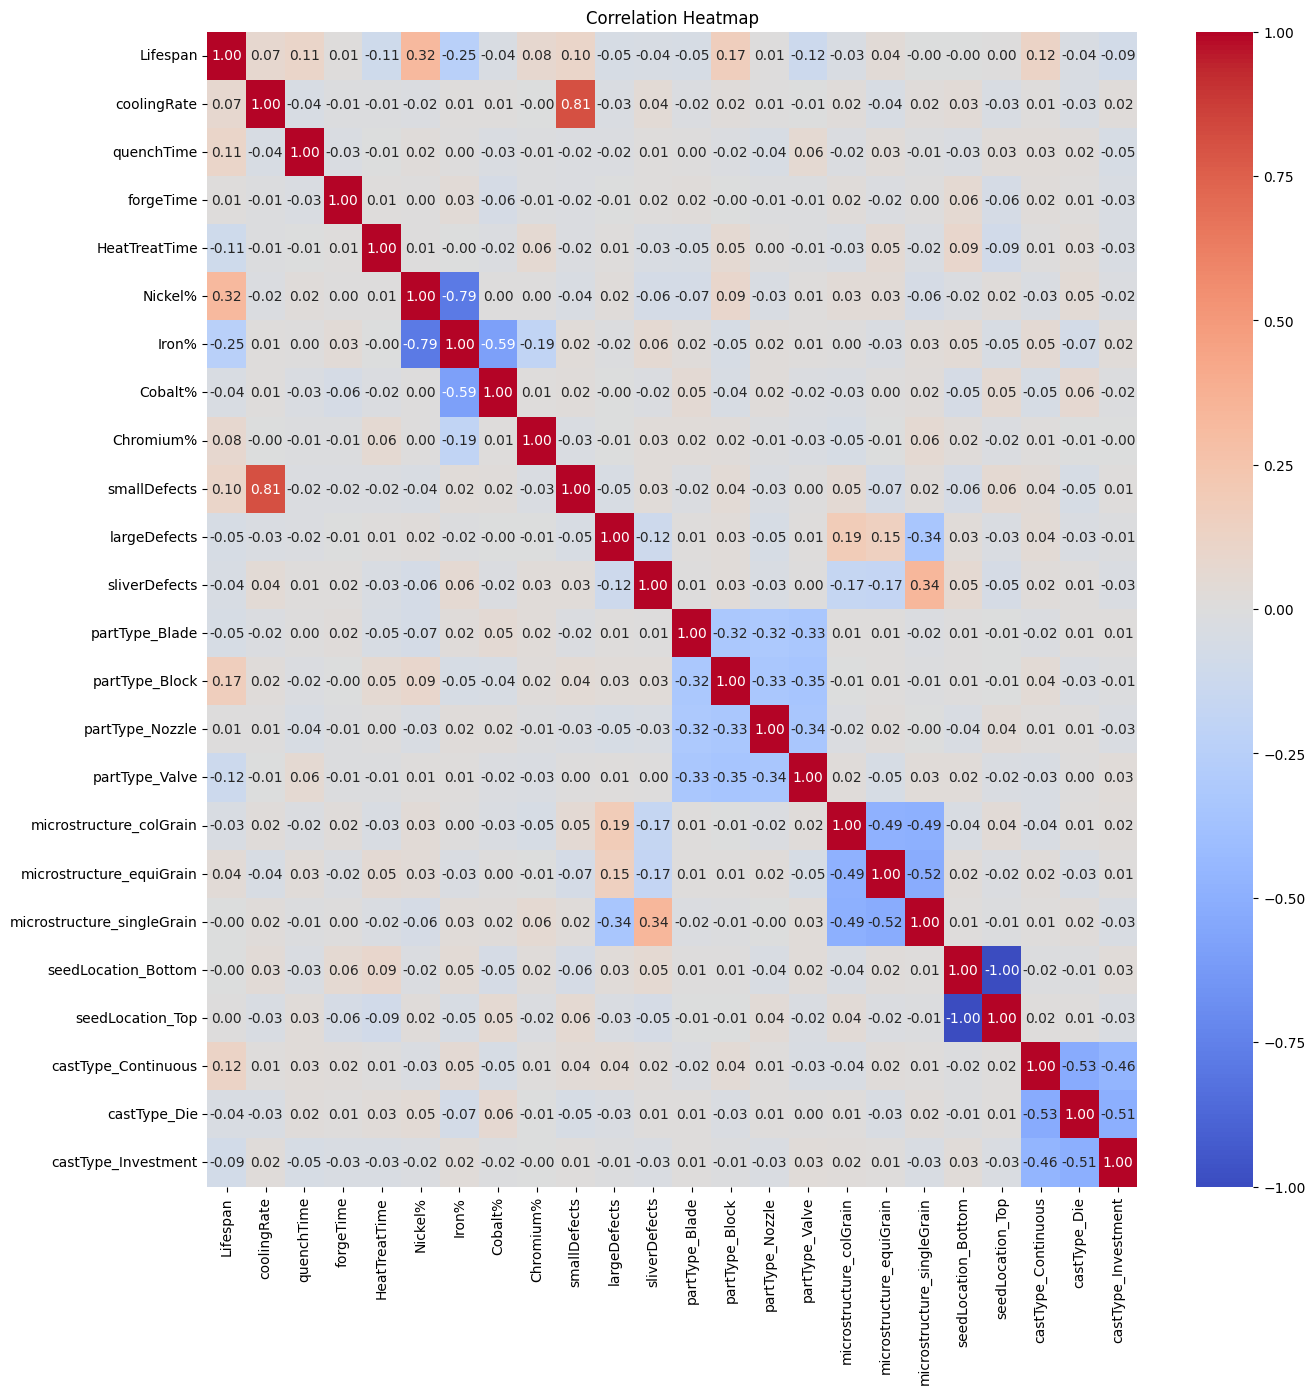

In [ ]:
correlation_matrix = coursework_dataset_copy.corr()
# Set the figure size
plt.figure(figsize=(15, 15))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


standardizing the data

In [ ]:

#standardizing the data
columns_to_standardize = ['Lifespan', 'coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime',
       'Nickel%', 'Iron%', 'Cobalt%', 'Chromium%', 'smallDefects',
       'largeDefects', 'sliverDefects', 'partType_Blade', 'partType_Block',
       'partType_Nozzle', 'partType_Valve', 'microstructure_colGrain',
       'microstructure_equiGrain', 'microstructure_singleGrain',
       'seedLocation_Bottom', 'seedLocation_Top', 'castType_Continuous',
       'castType_Die', 'castType_Investment']
#initializing
scaler = StandardScaler()
coursework_dataset_copy[columns_to_standardize]= scaler.fit_transform(coursework_dataset_copy[columns_to_standardize])

In [ ]:
display(coursework_dataset_copy)

Lifespan  coolingRate  quenchTime  forgeTime  HeatTreatTime   Nickel%  \
0    0.501951    -0.619522    0.817256   0.386215       0.987828  0.948051   
1    1.456551     0.181757   -0.109571  -0.762366       0.859281 -1.040691   
2   -1.759205     1.383674   -1.522601  -1.584428      -1.223538 -1.453644   
3   -0.636821    -1.153707   -0.572984  -1.257908      -0.586726 -0.555168   
4    1.589501    -0.218883    1.037567  -0.612551      -0.833158 -0.107658   
..        ...          ...         ...        ...            ...       ...   
995 -0.238470    -1.687893   -0.648953   1.185229       0.270452  1.359276   
996 -1.637258    -1.020161   -1.590973   0.970110       0.948731 -1.553859   
997  0.440433    -0.085336    0.270276   0.824136       1.757926 -1.063153   
998 -0.586806     0.715942    1.303460  -1.181080      -0.738969 -1.714548   
999 -0.622935    -1.020161    0.574154  -1.219494       0.586784  1.124290   

        Iron%   Cobalt%  Chromium%  smallDefects  ...  partType_Nozzle  \
0   -1.090327  1.012533  -1.386789     -0.596221  ...         1.755458   
1    1.469374 -1.453393   1.124840      0.137740  ...        -0.569652   
2    1.546735 -0.836912   0.483734      1.442560  ...        -0.569652   
3   -0.166066  1.021768   0.008561     -1.411733  ...         1.755458   
4    0.382248 -0.227357  -0.911616     -0.596221  ...        -0.569652   
..        ...       ...        ...           ...  ...              ...   
995 -0.518941 -1.220192   0.936279     -1.411733  ...        -0.569652   
996  1.026923 -0.047261   1.230434     -1.330182  ...        -0.569652   
997  1.173502 -0.721466   0.476191     -0.106914  ...         1.755458   
998  0.999779  0.132834   1.494419     -0.514670  ...        -0.569652   
999 -1.692928  1.259587   0.385682     -0.677772  ...        -0.569652   

     partType_Valve  microstructure_colGrain  microstructure_equiGrain  \
0         -0.600453                -0.681270                  1.393261   
1         -0.600453                -0.681270                 -0.717741   
2         -0.600453                -0.681270                  1.393261   
3         -0.600453                 1.467847                 -0.717741   
4         -0.600453                 1.467847                 -0.717741   
..              ...                      ...                       ...   
995       -0.600453                -0.681270                 -0.717741   
996       -0.600453                -0.681270                 -0.717741   
997       -0.600453                -0.681270                  1.393261   
998        1.665408                 1.467847                 -0.717741   
999        1.665408                 1.467847                 -0.717741   

     microstructure_singleGrain  seedLocation_Bottom  seedLocation_Top  \
0                     -0.722544             1.006018         -1.006018   
1                      1.383999             1.006018         -1.006018   
2                     -0.722544             1.006018         -1.006018   
3                     -0.722544            -0.994018          0.994018   
4                     -0.722544            -0.994018          0.994018   
..                          ...                  ...               ...   
995                    1.383999             1.006018         -1.006018   
996                    1.383999             1.006018         -1.006018   
997                   -0.722544             1.006018         -1.006018   
998                   -0.722544            -0.994018          0.994018   
999                   -0.722544            -0.994018          0.994018   

     castType_Continuous  castType_Die  castType_Investment  
0              -0.697054      1.316146            -0.665584  
1              -0.697054     -0.759794             1.502441  
2              -0.697054     -0.759794             1.502441  
3               1.434609     -0.759794            -0.665584  
4              -0.697054      1.316146            -0.665584  
..                   ...     

Performing principal component analysis to overcome multicollinearity between features

In [ ]:
#since all the microstructures are correlated, doing pca here
correlated_features = ['microstructure_colGrain',	'microstructure_equiGrain',	'microstructure_singleGrain']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['microstructure'] = principal_component

#since all the parttype are correlated, doing pca here
correlated_features = ['partType_Blade', 'partType_Block','partType_Nozzle', 'partType_Valve']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['partType'] = principal_component


#since all the casttype are correlated, doing pca here
correlated_features = ['castType_Continuous','castType_Die', 'castType_Investment']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['castType'] = principal_component

#since all the seed location are correlated, doing pca here
correlated_features = ['seedLocation_Bottom', 'seedLocation_Top']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['seedLocation'] = principal_component

correlated_features = ['Nickel%','Iron%']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['nickel_iron%'] = principal_component

correlated_features = ['smallDefects','coolingRate']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['smalldefect_coolingrate'] = principal_component

correlated_features = ['Cobalt%','Iron%']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['cobalt_iron%'] = principal_component

#dropping all the correlated features
coursework_dataset_copy = coursework_dataset_copy.drop(['microstructure_colGrain',	'microstructure_equiGrain',	'microstructure_singleGrain',
                                                        'Cobalt%','Iron%','smallDefects','coolingRate','Nickel%',
                                                        'partType_Blade', 'partType_Block','partType_Nozzle', 'partType_Valve',
                                                        'castType_Continuous','castType_Die', 'castType_Investment',
                                                        'seedLocation_Bottom', 'seedLocation_Top'],axis=1)

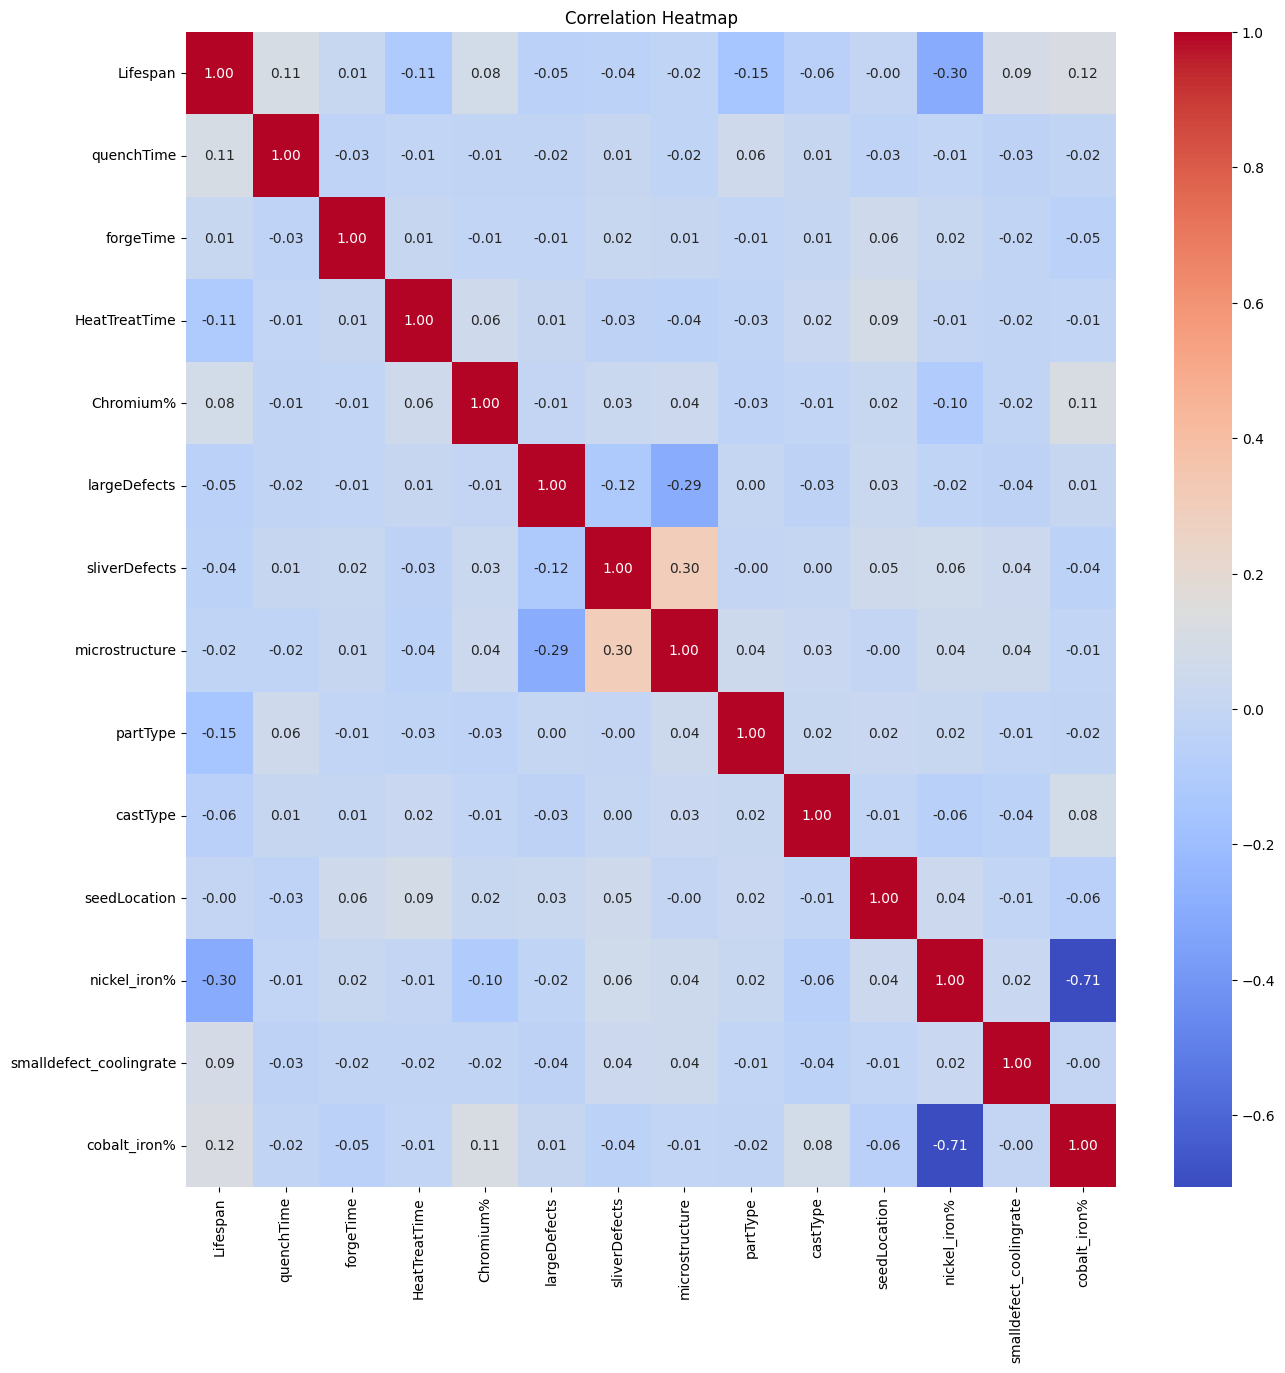

In [ ]:
correlation_matrix = coursework_dataset_copy.corr()
# Set the figure size
plt.figure(figsize=(15, 15))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


In [ ]:
#performing pca on the remaining correlated features
correlated_features = ['nickel_iron%','cobalt_iron%']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['cobalt_iron_nickel%'] = principal_component


correlated_features = ['sliverDefects','largeDefects','microstructure']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['sliver_largedefects_microstructure'] = principal_component
coursework_dataset_copy = coursework_dataset_copy.drop(['nickel_iron%','cobalt_iron%','sliverDefects','largeDefects','microstructure'], axis=1)

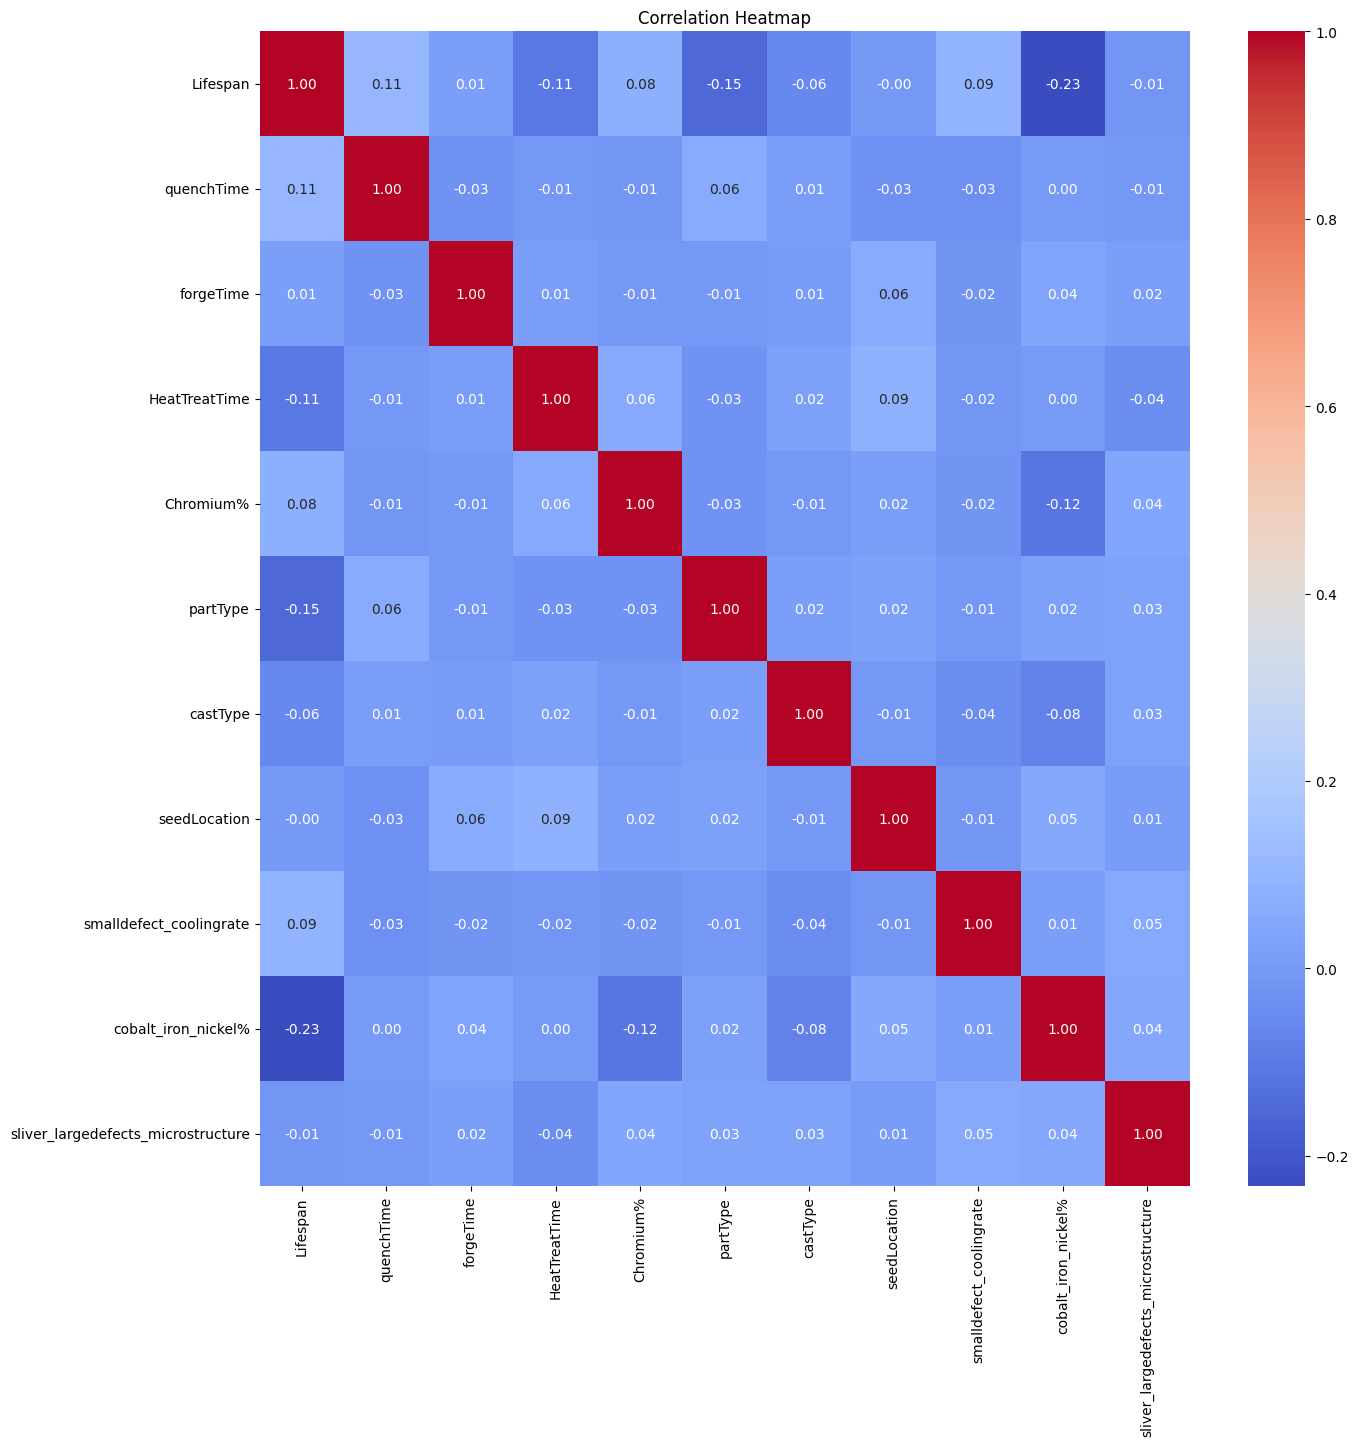

In [ ]:
correlation_matrix = coursework_dataset_copy.corr()
# Set the figure size
plt.figure(figsize=(15, 15))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


plotting scatterplot

Text(0, 0.5, 'Lifespan')

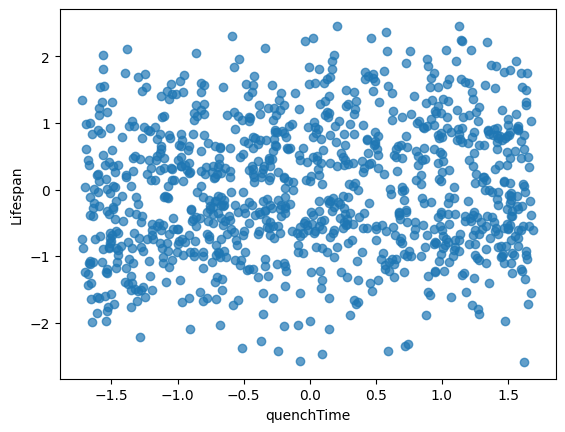

In [ ]:
plt.scatter( coursework_dataset_copy['quenchTime'],coursework_dataset_copy['Lifespan'], alpha=0.7)
plt.xlabel('quenchTime')
plt.ylabel('Lifespan')

Text(0, 0.5, 'Lifespan')

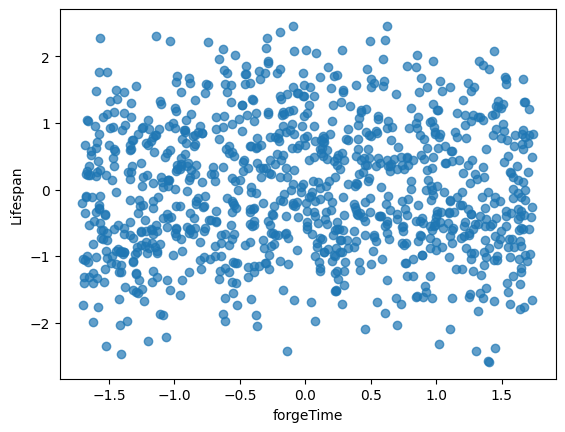

In [ ]:
plt.scatter( coursework_dataset_copy['forgeTime'],coursework_dataset_copy['Lifespan'], label='forgeTime', alpha=0.7)
plt.xlabel('forgeTime')
plt.ylabel('Lifespan')

Text(0, 0.5, 'Lifespan')

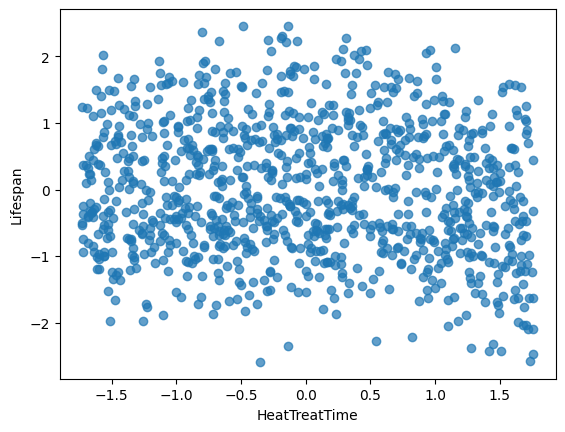

In [ ]:
plt.scatter( coursework_dataset_copy['HeatTreatTime'],coursework_dataset_copy['Lifespan'], label='HeatTreatTime', alpha=0.7)
plt.xlabel('HeatTreatTime')
plt.ylabel('Lifespan')

Text(0, 0.5, 'Lifespan')

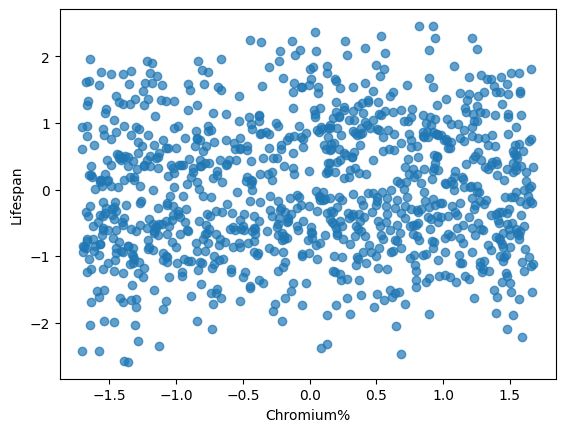

In [ ]:
plt.scatter( coursework_dataset_copy['Chromium%'],coursework_dataset_copy['Lifespan'], label='Chromium%', alpha=0.7)
plt.xlabel('Chromium%')
plt.ylabel('Lifespan')

Text(0, 0.5, 'Lifespan')

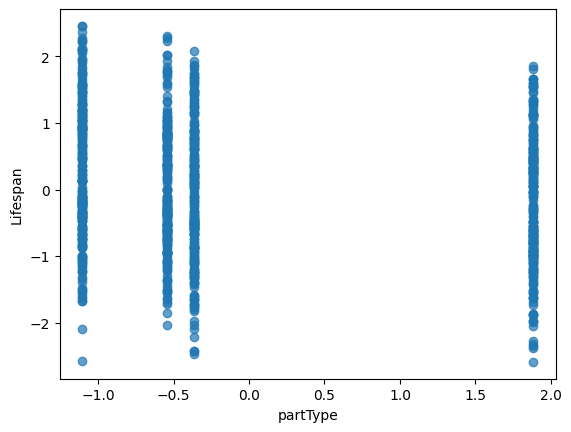

In [ ]:
plt.scatter( coursework_dataset_copy['partType'],coursework_dataset_copy['Lifespan'], label='partType', alpha=0.7)
plt.xlabel('partType')
plt.ylabel('Lifespan')

Text(0, 0.5, 'Lifespan')

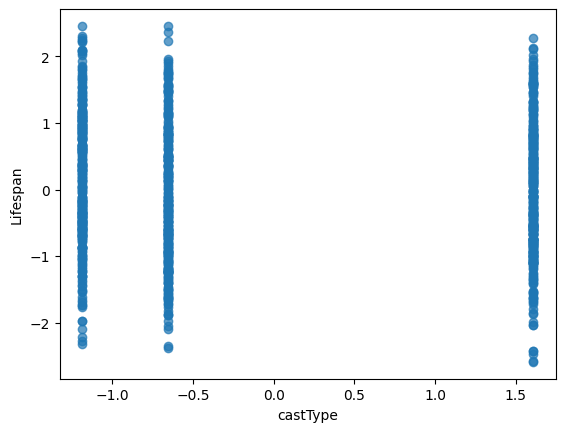

In [ ]:
plt.scatter( coursework_dataset_copy['castType'],coursework_dataset_copy['Lifespan'], label='castType', alpha=0.7)
plt.xlabel('castType')
plt.ylabel('Lifespan')

Text(0, 0.5, 'Lifespan')

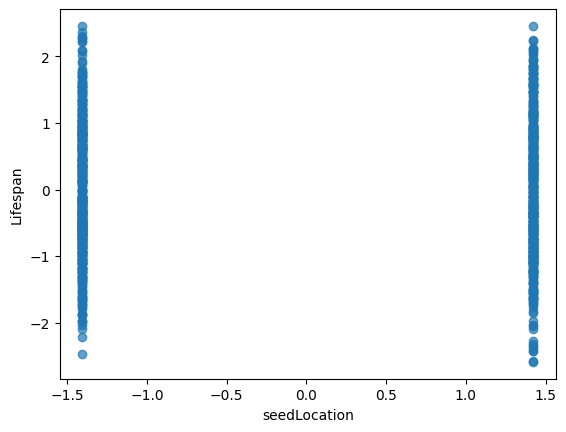

In [ ]:
plt.scatter( coursework_dataset_copy['seedLocation'],coursework_dataset_copy['Lifespan'], label='seedLocation', alpha=0.7)
plt.xlabel('seedLocation')
plt.ylabel('Lifespan')

Text(0, 0.5, 'Lifespan')

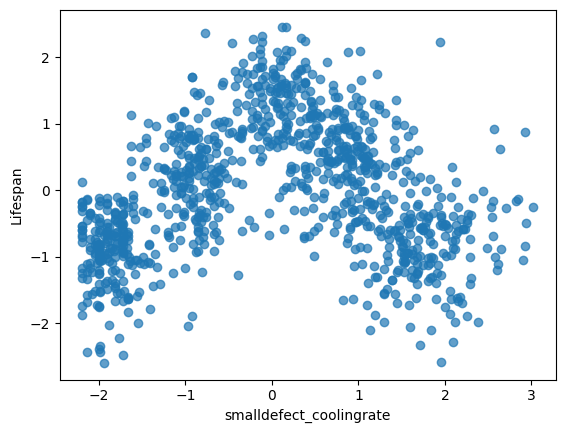

In [ ]:
plt.scatter( coursework_dataset_copy['smalldefect_coolingrate'],coursework_dataset_copy['Lifespan'], label='smalldefect_coolingrate', alpha=0.7)
plt.xlabel('smalldefect_coolingrate')
plt.ylabel('Lifespan')

Text(0, 0.5, 'Lifespan')

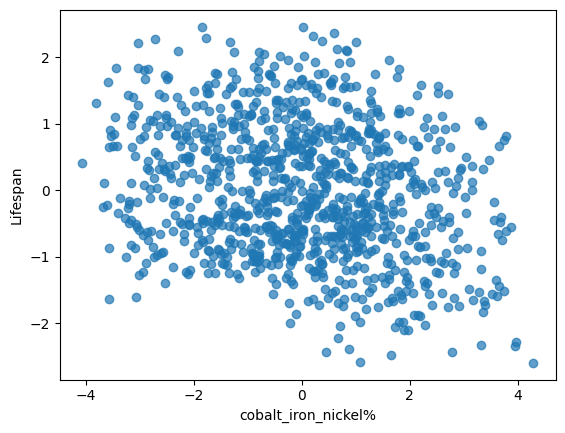

In [ ]:
plt.scatter( coursework_dataset_copy['cobalt_iron_nickel%'],coursework_dataset_copy['Lifespan'], label='cobalt_iron_nickel%', alpha=0.7)
plt.xlabel('cobalt_iron_nickel%')
plt.ylabel('Lifespan')

Text(0, 0.5, 'Lifespan')

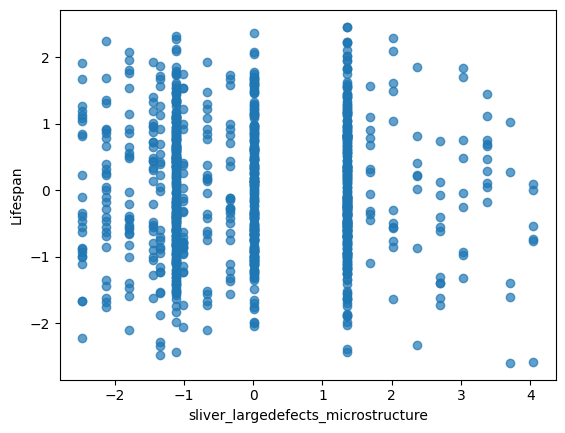

In [ ]:
plt.scatter( coursework_dataset_copy['sliver_largedefects_microstructure'],coursework_dataset_copy['Lifespan'], label='sliver_largedefects_microstructure', alpha=0.7)
plt.xlabel('sliver_largedefects_microstructure')
plt.ylabel('Lifespan')

# **Regression**

**Data Splitting**

In [ ]:
#extracting the feature names and target
features = coursework_dataset_copy[['quenchTime','HeatTreatTime','Chromium%','partType','castType','smalldefect_coolingrate','cobalt_iron_nickel%']]
target = coursework_dataset_copy['Lifespan']


In [ ]:
#splitting the dataset into train and test in the ratio of 80:20
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.20,random_state=0)

In [ ]:
print("Training data feature shape : " + str(x_train.shape))
print("Training data target shape : " + str(y_train.shape))
print("Testing data feature shape : " + str(x_test.shape))
print("Testing data target shape : " + str(x_test.shape))

Training data feature shape : (800, 7)
Training data target shape : (800,)
Testing data feature shape : (200, 7)
Testing data target shape : (200, 7)


## **Model 1: Polynomial Ridge Regression**

In [ ]:
#defining the polynomial ridge regression pipeline
ridge_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('ridge_features', Ridge())
])

#defining the hyperparameters for tuning
parameter_grid = {
    'poly_features__degree': [2, 3, 4, 5],  #polynomial degrees
    'ridge_features__alpha': [0.01, 0.1, 1, 10, 100],
    'ridge_features__fit_intercept':[True, False],
    'ridge_features__max_iter':[100,500],
    'ridge_features__solver':['auto','svd','cholesky','lsqr','saga']
}

#performing gridsearch to find the best parameters
grid_search = GridSearchCV(
    ridge_pipeline,
    parameter_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

#fitting the model
grid_search.fit(x_train, y_train)

#print the best parameter and cross validation score
# Print the best parameters and cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative MSE Score (Cross-validation):", grid_search.best_score_)

# Use the best model to predict on the validation set
best_ridge_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_test_prediction = best_ridge_model.predict(x_test)

# Calculate Test Set Evaluation Metrics
test_mse = mean_squared_error(y_test, y_test_prediction)
test_mae = mean_absolute_error(y_test, y_test_prediction)
test_r2 = r2_score(y_test, y_test_prediction)


# Print test set metrics
print("\nTest Set Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"R2 Score: {test_r2}")


Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best Parameters: {'poly_features__degree': 2, 'ridge_features__alpha': 10, 'ridge_features__fit_intercept': False, 'ridge_features__max_iter': 100, 'ridge_features__solver': 'svd'}
Best Negative MSE Score (Cross-validation): -0.43620030605884946

Test Set Evaluation Metrics:
Mean Squared Error (MSE): 0.4619843120117873
Mean Absolute Error (MAE): 0.5410495992179847
R2 Score: 0.5551841962012006


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


## **Model 2: Support Vector Regressor**

In [ ]:
# Define the SVR model
svr = SVR()

# Define hyperparameters for GridSearchCV
parameter_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    svr,
    parameter_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Negative MSE as the metric
    n_jobs=-1,  # Use all available cores for parallel computation
    verbose=1
)

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best parameters and cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative MSE Score (Cross-validation):", grid_search.best_score_)

# Use the best model to predict on the validation set
best_svr_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_test_prediction = best_svr_model.predict(x_test)

# Calculate Test Set Evaluation Metrics
test_mse = mean_squared_error(y_test, y_test_prediction)
test_mae = mean_absolute_error(y_test, y_test_prediction)
test_r2 = r2_score(y_test, y_test_prediction)


# Print test set metrics
print("\nTest Set Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"R² Score: {test_r2}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'C': 1, 'degree': 2, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Negative MSE Score (Cross-validation): -0.42359341385918475

Test Set Evaluation Metrics:
Mean Squared Error (MSE): 0.4541171950688468
Mean Absolute Error (MAE): 0.5328070468220009
R² Score: 0.5627589511345759


## **Model 3: XGBRegressor**

In [ ]:
# Define the XGB model
xgb = XGBRegressor()

# Define hyperparameters for GridSearchCV
parameter_grid = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.01, 0.1, 0.2],
    'maxdepth': [3,5,7],
    'subsample': [0.8,0.9,1.0],
    'colsample_bytree': [0.8,0.9,1.0]
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    xgb,
    parameter_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best parameters and cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative MSE Score (Cross-validation):", grid_search.best_score_)

# Use the best model to predict on the validation set
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_test_predictions = best_xgb_model.predict(x_test)

# Calculate Test Set Evaluation Metrics
test_mse = mean_squared_error(y_test, y_test_predictions)
test_mae = mean_absolute_error(y_test, y_test_predictions)
test_r2 = r2_score(y_test, y_test_predictions)

# Print test set metrics
print("\nTest Set Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"R2 Score: {test_r2}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:31:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "maxdepth" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'maxdepth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best Negative MSE Score (Cross-validation): -0.3638448726518188

Test Set Evaluation Metrics:
Mean Squared Error (MSE): 0.3531202412666888
Mean Absolute Error (MAE): 0.44785019814491805
R2 Score: 0.6600026020955869


# **Classification**

## **Approach 1: 1500 Thresholding based**

In [ ]:
coursework_dataset = files.upload()
coursework_dataset = pd.read_csv('COMP1801_Coursework_Dataset.csv')

Saving COMP1801_Coursework_Dataset.csv to COMP1801_Coursework_Dataset (5).csv


In [ ]:
display(coursework_dataset)

Lifespan partType microstructure  coolingRate  quenchTime  forgeTime  \
0     1469.17   Nozzle      equiGrain           13        3.84       6.47   
1     1793.64    Block    singleGrain           19        2.62       3.48   
2      700.60    Blade      equiGrain           28        0.76       1.34   
3     1082.10   Nozzle       colGrain            9        2.01       2.19   
4     1838.83    Blade       colGrain           16        4.13       3.87   
..        ...      ...            ...          ...         ...        ...   
995   1217.50    Block    singleGrain            5        1.91       8.55   
996    742.05    Block    singleGrain           10        0.67       7.99   
997   1448.26   Nozzle      equiGrain           17        3.12       7.61   
998   1099.10    Valve       colGrain           23        4.48       2.39   
999   1086.82    Valve       colGrain           10        3.52       2.29   

     HeatTreatTime  Nickel%  Iron%  Cobalt%  Chromium%  smallDefects  \
0            46.87    65.73  16.52    16.82       0.93            10   
1            44.70    54.22  35.38     6.14       4.26            19   
2             9.54    51.83  35.95     8.81       3.41            35   
3            20.29    57.03  23.33    16.86       2.78             0   
4            16.13    59.62  27.37    11.45       1.56            10   
..             ...      ...    ...      ...        ...           ...   
995          34.76    68.11  20.73     7.15       4.01             0   
996          46.21    51.25  32.12    12.23       4.40             1   
997          59.87    54.09  33.20     9.31       3.40            16   
998          17.72    50.32  31.92    13.01       4.75            11   
999          40.10    66.75  12.08    17.89       3.28             9   

     largeDefects  sliverDefects seedLocation    castType  
0               0              0       Bottom         Die  
1               0              0       Bottom  Investment  
2               3              0       Bottom  Investment  
3               1              0          Top  Continuous  
4               0              0          Top         Die  
..            ...            ...          ...         ...  
995             0              0       Bottom  Investment  
996             0              0       Bottom  Investment  
997             1              0       Bottom  Investment  
998             0              0          Top  Continuous  
999             3              0          Top  Continuous  

[1000 rows x 16 columns]

labelling the parts with 0 and 1. 0 indicates defective (lifespan <1500) and 1 indicates non-defective(lifespan>=1500)

In [ ]:
classification_dataset = coursework_dataset.copy()
classification_dataset['1500_labels'] = (classification_dataset['Lifespan'] >=1500).astype(int)

In [ ]:
display(classification_dataset)

Lifespan partType microstructure  coolingRate  quenchTime  forgeTime  \
0     1469.17   Nozzle      equiGrain           13        3.84       6.47   
1     1793.64    Block    singleGrain           19        2.62       3.48   
2      700.60    Blade      equiGrain           28        0.76       1.34   
3     1082.10   Nozzle       colGrain            9        2.01       2.19   
4     1838.83    Blade       colGrain           16        4.13       3.87   
..        ...      ...            ...          ...         ...        ...   
995   1217.50    Block    singleGrain            5        1.91       8.55   
996    742.05    Block    singleGrain           10        0.67       7.99   
997   1448.26   Nozzle      equiGrain           17        3.12       7.61   
998   1099.10    Valve       colGrain           23        4.48       2.39   
999   1086.82    Valve       colGrain           10        3.52       2.29   

     HeatTreatTime  Nickel%  Iron%  Cobalt%  Chromium%  smallDefects  \
0            46.87    65.73  16.52    16.82       0.93            10   
1            44.70    54.22  35.38     6.14       4.26            19   
2             9.54    51.83  35.95     8.81       3.41            35   
3            20.29    57.03  23.33    16.86       2.78             0   
4            16.13    59.62  27.37    11.45       1.56            10   
..             ...      ...    ...      ...        ...           ...   
995          34.76    68.11  20.73     7.15       4.01             0   
996          46.21    51.25  32.12    12.23       4.40             1   
997          59.87    54.09  33.20     9.31       3.40            16   
998          17.72    50.32  31.92    13.01       4.75            11   
999          40.10    66.75  12.08    17.89       3.28             9   

     largeDefects  sliverDefects seedLocation    castType  1500_labels  
0               0              0       Bottom         Die            0  
1               0              0       Bottom  Investment            1  
2               3              0       Bottom  Investment            0  
3               1              0          Top  Continuous            0  
4               0              0          Top         Die            1  
..            ...            ...          ...         ...          ...  
995             0              0       Bottom  Investment            0  
996             0              0       Bottom  Investment            0  
997             1              0       Bottom  Investment            0  
998             0              0          Top  Continuous            0  
999             3              0          Top  Continuous            0  

[1000 rows x 17 columns]

In [ ]:
classification_dataset.describe()

Lifespan  coolingRate   quenchTime    forgeTime  HeatTreatTime  \
count  1000.000000  1000.000000  1000.000000  1000.000000    1000.000000   
mean   1298.556320    17.639000     2.764230     5.464600      30.194510   
std     340.071434     7.491783     1.316979     2.604513      16.889415   
min     417.990000     5.000000     0.500000     1.030000       1.030000   
25%    1047.257500    11.000000     1.640000     3.170000      16.185000   
50%    1266.040000    18.000000     2.755000     5.475000      29.365000   
75%    1563.050000    24.000000     3.970000     7.740000      44.955000   
max    2134.530000    30.000000     4.990000    10.000000      59.910000   

           Nickel%        Iron%      Cobalt%    Chromium%  smallDefects  \
count  1000.000000  1000.000000  1000.000000  1000.000000   1000.000000   
mean     60.243080    24.553580    12.434690     2.768650     17.311000   
std       5.790475     7.371737     4.333197     1.326496     12.268365   
min      50.020000     6.660000     5.020000     0.510000      0.000000   
25%      55.287500    19.387500     8.597500     1.590000      7.000000   
50%      60.615000    24.690000    12.585000     2.865000     18.000000   
75%      65.220000    29.882500    16.080000     3.922500     26.000000   
max      69.950000    43.650000    19.990000     4.990000     61.000000   

       largeDefects  sliverDefects  1500_labels  
count   1000.000000    1000.000000   1000.00000  
mean       0.550000       0.292000      0.30600  
std        1.163982       1.199239      0.46106  
min        0.000000       0.000000      0.00000  
25%        0.000000       0.000000      0.00000  
50%        0.000000       0.000000      0.00000  
75%        0.000000       0.000000      1.00000  
max        4.000000       8.000000      1.00000

checking for class imbalance

In [ ]:
label_count = classification_dataset['1500_labels'].value_counts()
print(label_count)

1500_labels
0    694
1    306
Name: count, dtype: int64


preprocessing the data

In [ ]:
#creating a copy of the original dataset to encode the categorical features
coursework_dataset_copy = classification_dataset.copy()
#creating one hot encoder object
oneHotEncoderObject = OneHotEncoder(sparse_output=False)
#features to be encoded
categorical_features = ['partType','microstructure','seedLocation','castType']
EncodedValues = oneHotEncoderObject.fit_transform(coursework_dataset_copy[categorical_features])
#creating a datafram with the encoded categorical features
encoded_dataframe = pd.DataFrame(EncodedValues, columns = oneHotEncoderObject.get_feature_names_out(categorical_features))
#concatenating the encoded dataframe with the actual dataframe
coursework_dataset_copy = pd.concat([coursework_dataset_copy,encoded_dataframe], axis=1)
#dropping the original categorical feature columns
coursework_dataset_copy = coursework_dataset_copy.drop(categorical_features, axis=1)

In [ ]:
display(coursework_dataset_copy)

Lifespan  coolingRate  quenchTime  forgeTime  HeatTreatTime  Nickel%  \
0     1469.17           13        3.84       6.47          46.87    65.73   
1     1793.64           19        2.62       3.48          44.70    54.22   
2      700.60           28        0.76       1.34           9.54    51.83   
3     1082.10            9        2.01       2.19          20.29    57.03   
4     1838.83           16        4.13       3.87          16.13    59.62   
..        ...          ...         ...        ...            ...      ...   
995   1217.50            5        1.91       8.55          34.76    68.11   
996    742.05           10        0.67       7.99          46.21    51.25   
997   1448.26           17        3.12       7.61          59.87    54.09   
998   1099.10           23        4.48       2.39          17.72    50.32   
999   1086.82           10        3.52       2.29          40.10    66.75   

     Iron%  Cobalt%  Chromium%  smallDefects  ...  partType_Nozzle  \
0    16.52    16.82       0.93            10  ...              1.0   
1    35.38     6.14       4.26            19  ...              0.0   
2    35.95     8.81       3.41            35  ...              0.0   
3    23.33    16.86       2.78             0  ...              1.0   
4    27.37    11.45       1.56            10  ...              0.0   
..     ...      ...        ...           ...  ...              ...   
995  20.73     7.15       4.01             0  ...              0.0   
996  32.12    12.23       4.40             1  ...              0.0   
997  33.20     9.31       3.40            16  ...              1.0   
998  31.92    13.01       4.75            11  ...              0.0   
999  12.08    17.89       3.28             9  ...              0.0   

     partType_Valve  microstructure_colGrain  microstructure_equiGrain  \
0               0.0                      0.0                       1.0   
1               0.0                      0.0                       0.0   
2               0.0                      0.0                       1.0   
3               0.0                      1.0                       0.0   
4               0.0                      1.0                       0.0   
..              ...                      ...                       ...   
995             0.0                      0.0                       0.0   
996             0.0                      0.0                       0.0   
997             0.0                      0.0                       1.0   
998             1.0                      1.0                       0.0   
999             1.0                      1.0                       0.0   

     microstructure_singleGrain  seedLocation_Bottom  seedLocation_Top  \
0                           0.0                  1.0               0.0   
1                           1.0                  1.0               0.0   
2                           0.0                  1.0               0.0   
3                           0.0                  0.0               1.0   
4                           0.0                  0.0               1.0   
..                          ...                  ...               ...   
995                         1.0                  1.0               0.0   
996                         1.0                  1.0               0.0   
997                         0.0                  1.0               0.0   
998                         0.0                  0.0               1.0   
999                         0.0                  0.0               1.0   

     castType_Continuous  castType_Die  castType_Investment  
0                    0.0           1.0                  0.0  
1                    0.0           0.0                  1.0  
2                    0.0           0.0                  1.0  
3                    1.0           0.0                  0.0  
4                    0.0           1.0                  0.0  
..                   ...           ...                  ...  
995                  0.0   


Since the column '1500_labels' were created using lifespan data, to prevent data leakage, lifespan feature is removing from the data

In [ ]:
dataset = coursework_dataset_copy.copy()
coursework_dataset_copy = coursework_dataset_copy.drop('Lifespan',axis=1)

In [ ]:

#standardizing the data
columns_to_standardize = ['coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime',
       'Nickel%', 'Iron%', 'Cobalt%', 'Chromium%', 'smallDefects',
       'largeDefects', 'sliverDefects', 'partType_Blade', 'partType_Block',
       'partType_Nozzle', 'partType_Valve', 'microstructure_colGrain',
       'microstructure_equiGrain', 'microstructure_singleGrain',
       'seedLocation_Bottom', 'seedLocation_Top', 'castType_Continuous',
       'castType_Die', 'castType_Investment']
#initializing
scaler = StandardScaler()
coursework_dataset_copy[columns_to_standardize]= scaler.fit_transform(coursework_dataset_copy[columns_to_standardize])

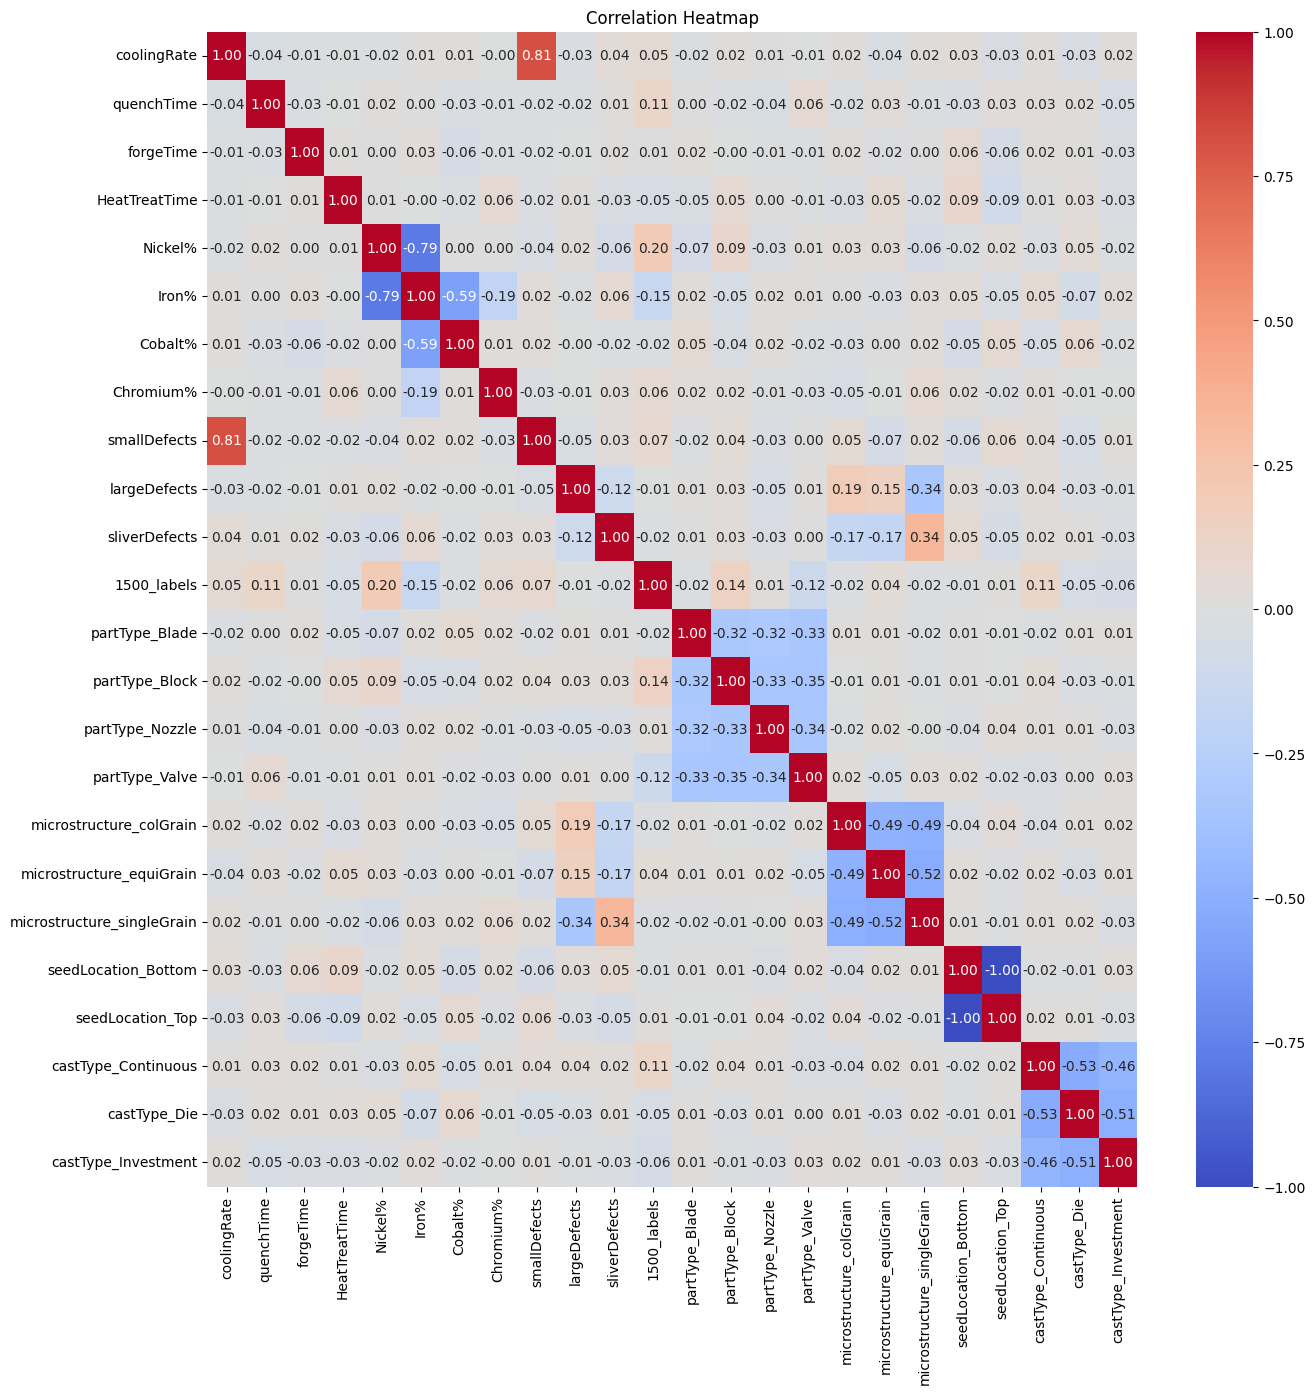

In [ ]:
correlation_matrix = coursework_dataset_copy.corr()
# Set the figure size
plt.figure(figsize=(15, 15))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


In [ ]:
#since all the microstructures are correlated, doing pca here
correlated_features = ['microstructure_colGrain',	'microstructure_equiGrain',	'microstructure_singleGrain']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['microstructure'] = principal_component

#since all the parttype are correlated, doing pca here
correlated_features = ['partType_Blade', 'partType_Block','partType_Nozzle', 'partType_Valve']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['partType'] = principal_component


#since all the casttype are correlated, doing pca here
correlated_features = ['castType_Continuous','castType_Die', 'castType_Investment']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['castType'] = principal_component

#since all the seed location are correlated, doing pca here
correlated_features = ['seedLocation_Bottom', 'seedLocation_Top']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['seedLocation'] = principal_component

correlated_features = ['Nickel%','Iron%']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['nickel_iron%'] = principal_component

correlated_features = ['smallDefects','coolingRate']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['smalldefect_coolingrate'] = principal_component

correlated_features = ['Cobalt%','Iron%']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['cobalt_iron%'] = principal_component

#dropping all the correlated features
coursework_dataset_copy = coursework_dataset_copy.drop(['microstructure_colGrain',	'microstructure_equiGrain',	'microstructure_singleGrain',
                                                        'Cobalt%','Iron%','smallDefects','coolingRate','Nickel%',
                                                        'partType_Blade', 'partType_Block','partType_Nozzle', 'partType_Valve',
                                                        'castType_Continuous','castType_Die', 'castType_Investment',
                                                        'seedLocation_Bottom', 'seedLocation_Top'],axis=1)

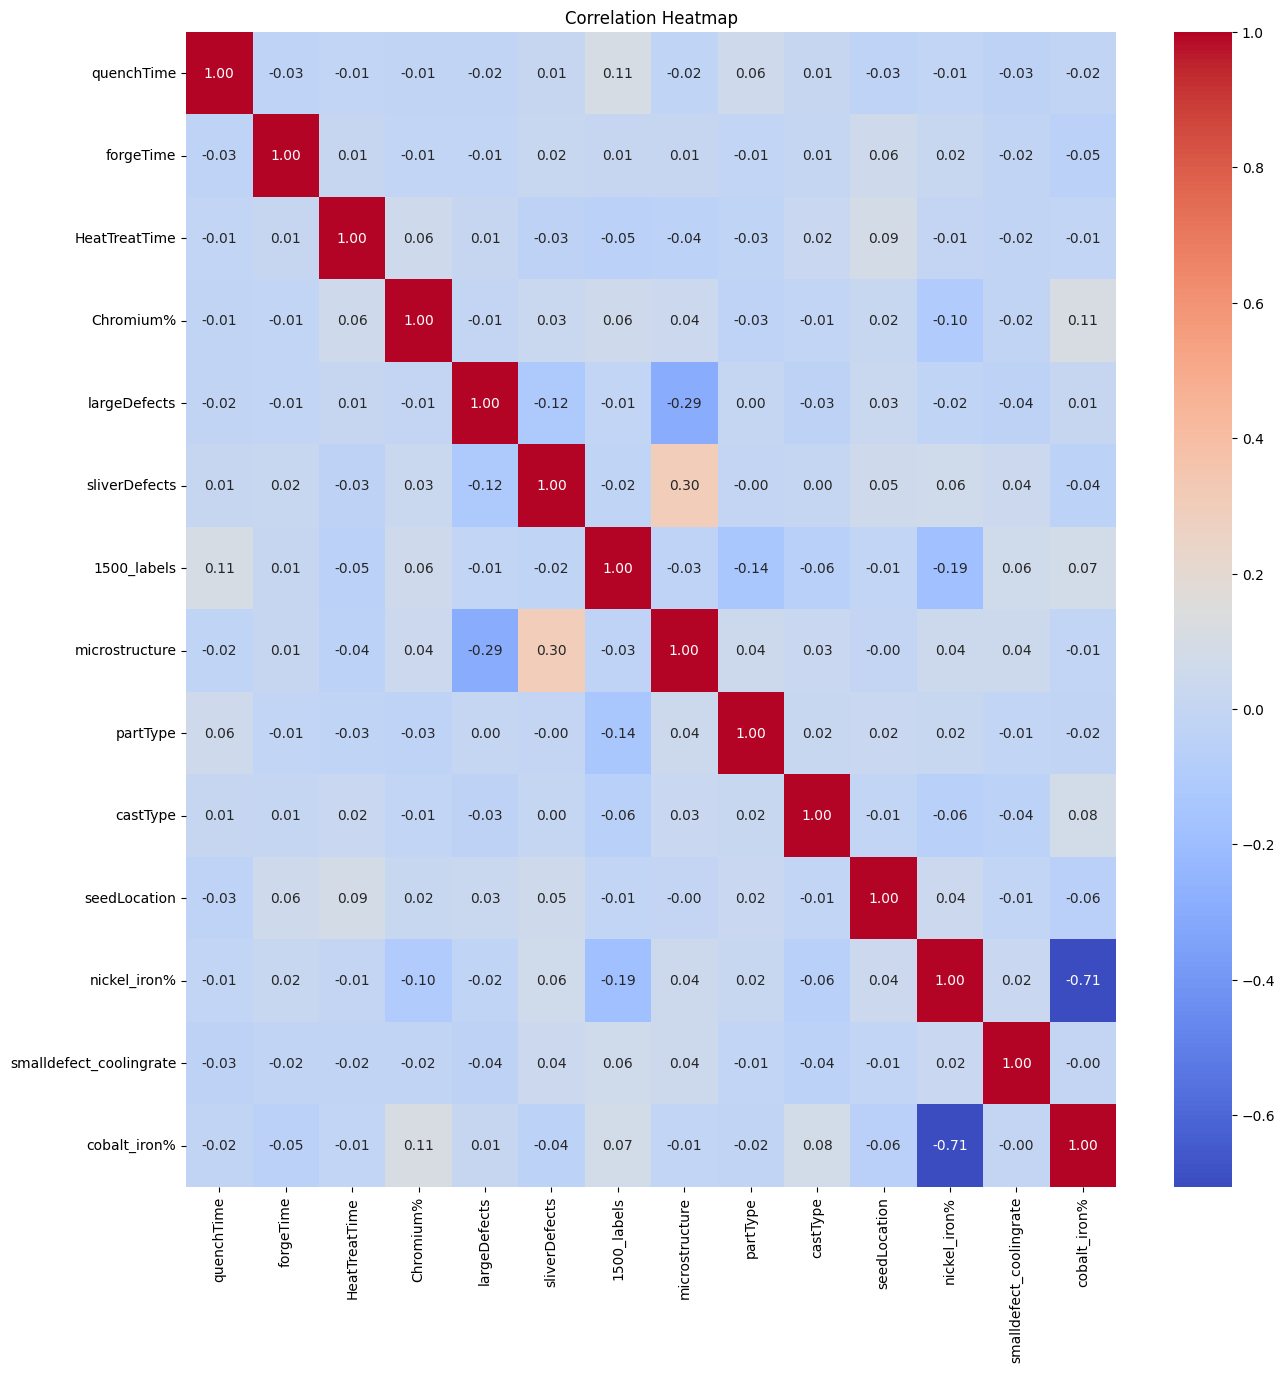

In [ ]:
correlation_matrix = coursework_dataset_copy.corr()
# Set the figure size
plt.figure(figsize=(15, 15))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


In [ ]:
#performing pca on the remaining correlated features
correlated_features = ['nickel_iron%','cobalt_iron%']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['cobalt_iron_nickel%'] = principal_component


correlated_features = ['sliverDefects','largeDefects','microstructure']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['sliver_largedefects_microstructure'] = principal_component
coursework_dataset_copy = coursework_dataset_copy.drop(['nickel_iron%','cobalt_iron%','sliverDefects','largeDefects','microstructure'], axis=1)

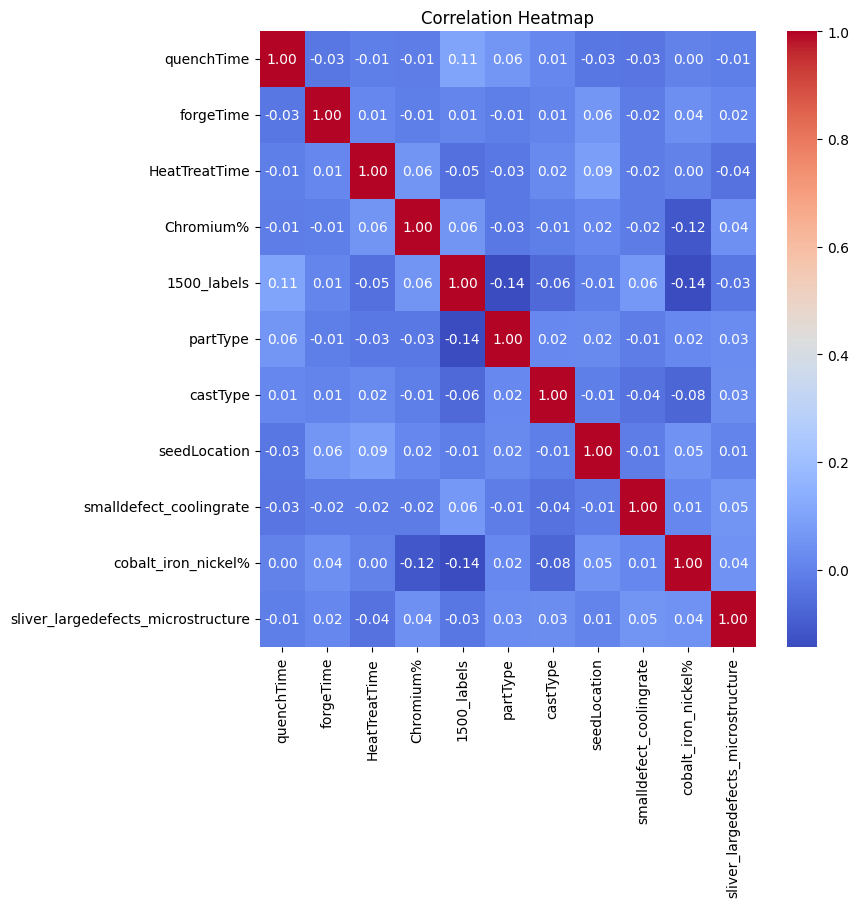

In [ ]:
correlation_matrix = coursework_dataset_copy.corr()
# Set the figure size
plt.figure(figsize=(8, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


selecting the features for classification

In [ ]:
features = coursework_dataset_copy[['quenchTime','forgeTime','Chromium%','partType','seedLocation','smalldefect_coolingrate','cobalt_iron_nickel%','sliver_largedefects_microstructure']]
target = coursework_dataset_copy['1500_labels']

splitting the data into train and test in the ratio 80:20

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.20,random_state=0,stratify=target)

In [ ]:
print("Training data feature shape : " + str(X_train.shape))
print("Training data target shape : " + str(y_train.shape))
print("Testing data feature shape : " + str(X_test.shape))
print("Testing data target shape : " + str(y_test.shape))

Training data feature shape : (800, 8)
Training data target shape : (800,)
Testing data feature shape : (200, 8)
Testing data target shape : (200,)


## **Model 1: Logistic Regression**

In [ ]:
#defining the model
logistic_regression = LogisticRegression()

#defining the hyperparameters
parameter_grid_logistic_regression = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga','lbfgs','newton-cg'],
    'max_iter':[100,200,500,1000],
    'fit_intercept':[True,False]
}



# Perform GridSearchCV
grid_search= GridSearchCV(logistic_regression,
                          parameter_grid_logistic_regression,
                          cv=5,
                          scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and cross-validation score
print("Best Parameters:", grid_search.best_params_)


# Use the best model to predict on the validation set
best_lr_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_test_predictions = best_lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_predictions)
print("Best Logistic Regression Accuracy:", accuracy)
print("Best Logistic Regression Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_test_predictions))

Best Parameters: {'C': 0.01, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Logistic Regression Accuracy: 0.695
Best Logistic Regression Parameters: {'C': 0.01, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       139
           1       0.00      0.00      0.00        61

    accuracy                           0.69       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.48      0.69      0.57       200



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
960 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File 

## **Model 1: Random forest classifier**

In [ ]:
#defining the model
rf = RandomForestClassifier(random_state=42)

#defining the hyperparameters
parameter_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True,False]
}



# Perform GridSearchCV
grid_search= GridSearchCV(rf,
                          parameter_grid_rf,
                          cv=5,
                          scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and cross-validation score
print("Best Parameters:", grid_search.best_params_)


# Use the best model to predict on the validation set
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_test_predictions = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_predictions)
print("Best Random forest model Accuracy:", accuracy)
print("Best random forest model Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_test_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
2160 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Best Random forest model Accuracy: 0.835
Best random forest model Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       139
           1       0.79      0.62      0.70        61

    accuracy                           0.83       200
   macro avg       0.82      0.78      0.79       200
weighted avg       0.83      0.83      0.83       200



## **Model 2: Gradient Boost**

In [ ]:
#defining the model
xgb = GradientBoostingClassifier(random_state=42)

#defining the hyperparameters
parameter_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features':['sqrt','log2'],
    'loss':['log_loss','exponential']
}



# Perform GridSearchCV
grid_search= GridSearchCV(xgb,
                          parameter_grid_xgb,
                          cv=5,
                          scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and cross-validation score
print("Best Parameters:", grid_search.best_params_)


# Use the best model to predict on the validation set
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_test_predictions = best_xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_predictions)
print("Best Random forest model Accuracy:", accuracy)
print("Best random forest model Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_test_predictions))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
Best Random forest model Accuracy: 0.82
Best random forest model Parameters: {'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       139
           1       0.71      0.69      0.70        61

    accuracy                           0.82       200
   macro avg       0.79      0.78      0.79       200
weighted avg       0.82      0.82      0.82       200



## **Approach 2:  Statistical Outlier Function based threshold**

In [ ]:
coursework_dataset = files.upload()
coursework_dataset = pd.read_csv('COMP1801_Coursework_Dataset.csv')

Saving COMP1801_Coursework_Dataset.csv to COMP1801_Coursework_Dataset (4).csv


In [ ]:
display(coursework_dataset)

Lifespan partType microstructure  coolingRate  quenchTime  forgeTime  \
0     1469.17   Nozzle      equiGrain           13        3.84       6.47   
1     1793.64    Block    singleGrain           19        2.62       3.48   
2      700.60    Blade      equiGrain           28        0.76       1.34   
3     1082.10   Nozzle       colGrain            9        2.01       2.19   
4     1838.83    Blade       colGrain           16        4.13       3.87   
..        ...      ...            ...          ...         ...        ...   
995   1217.50    Block    singleGrain            5        1.91       8.55   
996    742.05    Block    singleGrain           10        0.67       7.99   
997   1448.26   Nozzle      equiGrain           17        3.12       7.61   
998   1099.10    Valve       colGrain           23        4.48       2.39   
999   1086.82    Valve       colGrain           10        3.52       2.29   

     HeatTreatTime  Nickel%  Iron%  Cobalt%  Chromium%  smallDefects  \
0            46.87    65.73  16.52    16.82       0.93            10   
1            44.70    54.22  35.38     6.14       4.26            19   
2             9.54    51.83  35.95     8.81       3.41            35   
3            20.29    57.03  23.33    16.86       2.78             0   
4            16.13    59.62  27.37    11.45       1.56            10   
..             ...      ...    ...      ...        ...           ...   
995          34.76    68.11  20.73     7.15       4.01             0   
996          46.21    51.25  32.12    12.23       4.40             1   
997          59.87    54.09  33.20     9.31       3.40            16   
998          17.72    50.32  31.92    13.01       4.75            11   
999          40.10    66.75  12.08    17.89       3.28             9   

     largeDefects  sliverDefects seedLocation    castType  
0               0              0       Bottom         Die  
1               0              0       Bottom  Investment  
2               3              0       Bottom  Investment  
3               1              0          Top  Continuous  
4               0              0          Top         Die  
..            ...            ...          ...         ...  
995             0              0       Bottom  Investment  
996             0              0       Bottom  Investment  
997             1              0       Bottom  Investment  
998             0              0          Top  Continuous  
999             3              0          Top  Continuous  

[1000 rows x 16 columns]

finding threshold value using the statistical outlier function

In [ ]:
#finding the 25th and 75th percentile
q1 = coursework_dataset['Lifespan'].quantile(0.25)
q2 = coursework_dataset['Lifespan'].quantile(0.75)
#finding the lower bound and upper bound
inter_quartile_range = q2-q1
lower_bound = q1 - 1.5*inter_quartile_range
upper_bound = q2 + 1.5*inter_quartile_range
#finding the centroid, which will be the threshold
threshold = (upper_bound + lower_bound)/2

In [ ]:
threshold

1305.15375

labelling the parts with 0 and 1. 0 indicates defective (lifespan <threshold) and 1 indicates non-defective(lifespan>=threshold)

In [ ]:
classification_dataset = coursework_dataset.copy()
classification_dataset['labels'] = (classification_dataset['Lifespan'] >=threshold).astype(int)

In [ ]:
display(classification_dataset)

Lifespan partType microstructure  coolingRate  quenchTime  forgeTime  \
0     1469.17   Nozzle      equiGrain           13        3.84       6.47   
1     1793.64    Block    singleGrain           19        2.62       3.48   
2      700.60    Blade      equiGrain           28        0.76       1.34   
3     1082.10   Nozzle       colGrain            9        2.01       2.19   
4     1838.83    Blade       colGrain           16        4.13       3.87   
..        ...      ...            ...          ...         ...        ...   
995   1217.50    Block    singleGrain            5        1.91       8.55   
996    742.05    Block    singleGrain           10        0.67       7.99   
997   1448.26   Nozzle      equiGrain           17        3.12       7.61   
998   1099.10    Valve       colGrain           23        4.48       2.39   
999   1086.82    Valve       colGrain           10        3.52       2.29   

     HeatTreatTime  Nickel%  Iron%  Cobalt%  Chromium%  smallDefects  \
0            46.87    65.73  16.52    16.82       0.93            10   
1            44.70    54.22  35.38     6.14       4.26            19   
2             9.54    51.83  35.95     8.81       3.41            35   
3            20.29    57.03  23.33    16.86       2.78             0   
4            16.13    59.62  27.37    11.45       1.56            10   
..             ...      ...    ...      ...        ...           ...   
995          34.76    68.11  20.73     7.15       4.01             0   
996          46.21    51.25  32.12    12.23       4.40             1   
997          59.87    54.09  33.20     9.31       3.40            16   
998          17.72    50.32  31.92    13.01       4.75            11   
999          40.10    66.75  12.08    17.89       3.28             9   

     largeDefects  sliverDefects seedLocation    castType  labels  
0               0              0       Bottom         Die       1  
1               0              0       Bottom  Investment       1  
2               3              0       Bottom  Investment       0  
3               1              0          Top  Continuous       0  
4               0              0          Top         Die       1  
..            ...            ...          ...         ...     ...  
995             0              0       Bottom  Investment       0  
996             0              0       Bottom  Investment       0  
997             1              0       Bottom  Investment       1  
998             0              0          Top  Continuous       0  
999             3              0          Top  Continuous       0  

[1000 rows x 17 columns]

In [ ]:
classification_dataset.describe()

Lifespan  coolingRate   quenchTime    forgeTime  HeatTreatTime  \
count  1000.000000  1000.000000  1000.000000  1000.000000    1000.000000   
mean   1298.556320    17.639000     2.764230     5.464600      30.194510   
std     340.071434     7.491783     1.316979     2.604513      16.889415   
min     417.990000     5.000000     0.500000     1.030000       1.030000   
25%    1047.257500    11.000000     1.640000     3.170000      16.185000   
50%    1266.040000    18.000000     2.755000     5.475000      29.365000   
75%    1563.050000    24.000000     3.970000     7.740000      44.955000   
max    2134.530000    30.000000     4.990000    10.000000      59.910000   

           Nickel%        Iron%      Cobalt%    Chromium%  smallDefects  \
count  1000.000000  1000.000000  1000.000000  1000.000000   1000.000000   
mean     60.243080    24.553580    12.434690     2.768650     17.311000   
std       5.790475     7.371737     4.333197     1.326496     12.268365   
min      50.020000     6.660000     5.020000     0.510000      0.000000   
25%      55.287500    19.387500     8.597500     1.590000      7.000000   
50%      60.615000    24.690000    12.585000     2.865000     18.000000   
75%      65.220000    29.882500    16.080000     3.922500     26.000000   
max      69.950000    43.650000    19.990000     4.990000     61.000000   

       largeDefects  sliverDefects       labels  
count   1000.000000    1000.000000  1000.000000  
mean       0.550000       0.292000     0.477000  
std        1.163982       1.199239     0.499721  
min        0.000000       0.000000     0.000000  
25%        0.000000       0.000000     0.000000  
50%        0.000000       0.000000     0.000000  
75%        0.000000       0.000000     1.000000  
max        4.000000       8.000000     1.000000

checking for class imbalance

In [ ]:
label_count = classification_dataset['labels'].value_counts()
print(label_count)

labels
0    523
1    477
Name: count, dtype: int64


In [ ]:
#creating a copy of the original dataset to encode the categorical features
coursework_dataset_copy = classification_dataset.copy()
#creating one hot encoder object
oneHotEncoderObject = OneHotEncoder(sparse_output=False)
#features to be encoded
categorical_features = ['partType','microstructure','seedLocation','castType']
EncodedValues = oneHotEncoderObject.fit_transform(coursework_dataset_copy[categorical_features])
#creating a datafram with the encoded categorical features
encoded_dataframe = pd.DataFrame(EncodedValues, columns = oneHotEncoderObject.get_feature_names_out(categorical_features))
#concatenating the encoded dataframe with the actual dataframe
coursework_dataset_copy = pd.concat([coursework_dataset_copy,encoded_dataframe], axis=1)
#dropping the original categorical feature columns
coursework_dataset_copy = coursework_dataset_copy.drop(categorical_features, axis=1)

Since the column 'labels' were created using lifespan data, to prevent data leakage, lifespan feature is removing from the data

In [ ]:
coursework_dataset_copy = coursework_dataset_copy.drop('Lifespan',axis=1)

In [ ]:

#standardizing the data
columns_to_standardize = ['coolingRate', 'quenchTime', 'forgeTime', 'HeatTreatTime',
       'Nickel%', 'Iron%', 'Cobalt%', 'Chromium%', 'smallDefects',
       'largeDefects', 'sliverDefects', 'partType_Blade', 'partType_Block',
       'partType_Nozzle', 'partType_Valve', 'microstructure_colGrain',
       'microstructure_equiGrain', 'microstructure_singleGrain',
       'seedLocation_Bottom', 'seedLocation_Top', 'castType_Continuous',
       'castType_Die', 'castType_Investment']
#initializing
scaler = StandardScaler()
coursework_dataset_copy[columns_to_standardize]= scaler.fit_transform(coursework_dataset_copy[columns_to_standardize])

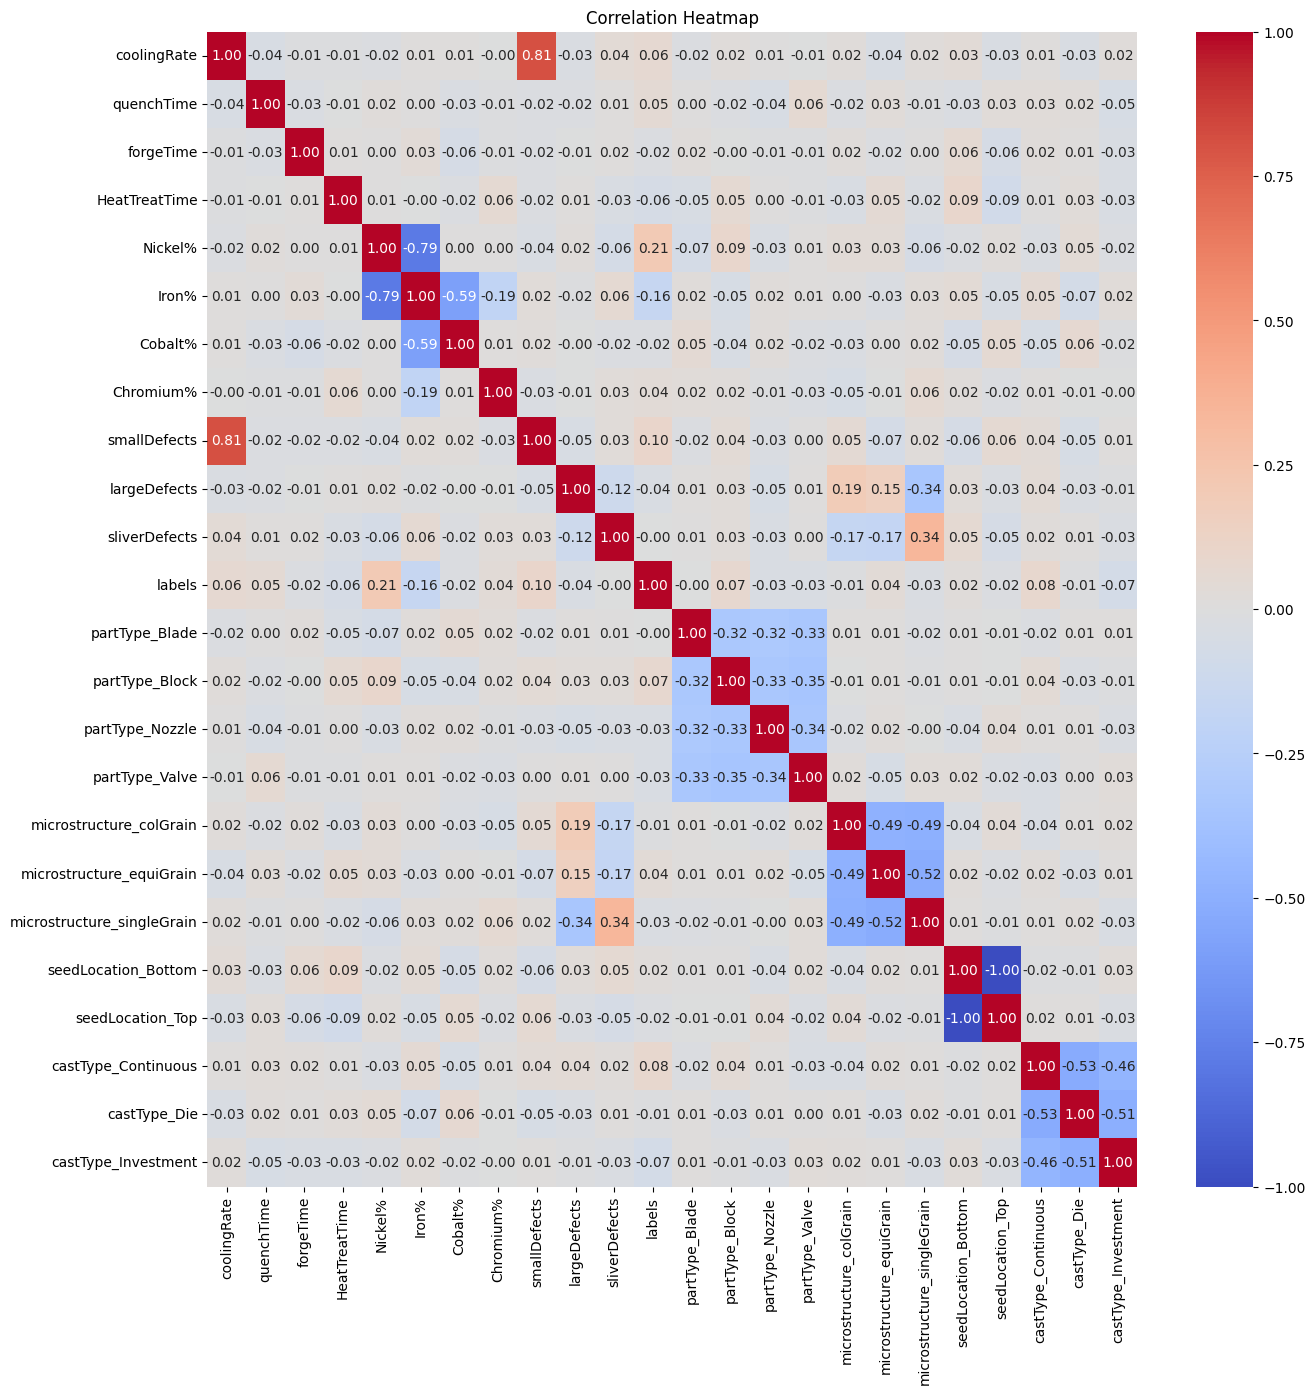

In [ ]:
correlation_matrix = coursework_dataset_copy.corr()
# Set the figure size
plt.figure(figsize=(15, 15))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


In [ ]:
#since all the microstructures are correlated, doing pca here
correlated_features = ['microstructure_colGrain',	'microstructure_equiGrain',	'microstructure_singleGrain']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['microstructure'] = principal_component

#since all the parttype are correlated, doing pca here
correlated_features = ['partType_Blade', 'partType_Block','partType_Nozzle', 'partType_Valve']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['partType'] = principal_component


#since all the casttype are correlated, doing pca here
correlated_features = ['castType_Continuous','castType_Die', 'castType_Investment']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['castType'] = principal_component

#since all the seed location are correlated, doing pca here
correlated_features = ['seedLocation_Bottom', 'seedLocation_Top']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['seedLocation'] = principal_component

correlated_features = ['Nickel%','Iron%']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['nickel_iron%'] = principal_component

correlated_features = ['smallDefects','coolingRate']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['smalldefect_coolingrate'] = principal_component

correlated_features = ['Cobalt%','Iron%']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['cobalt_iron%'] = principal_component

#dropping all the correlated features
coursework_dataset_copy = coursework_dataset_copy.drop(['microstructure_colGrain',	'microstructure_equiGrain',	'microstructure_singleGrain',
                                                        'Cobalt%','Iron%','smallDefects','coolingRate','Nickel%',
                                                        'partType_Blade', 'partType_Block','partType_Nozzle', 'partType_Valve',
                                                        'castType_Continuous','castType_Die', 'castType_Investment',
                                                        'seedLocation_Bottom', 'seedLocation_Top'],axis=1)

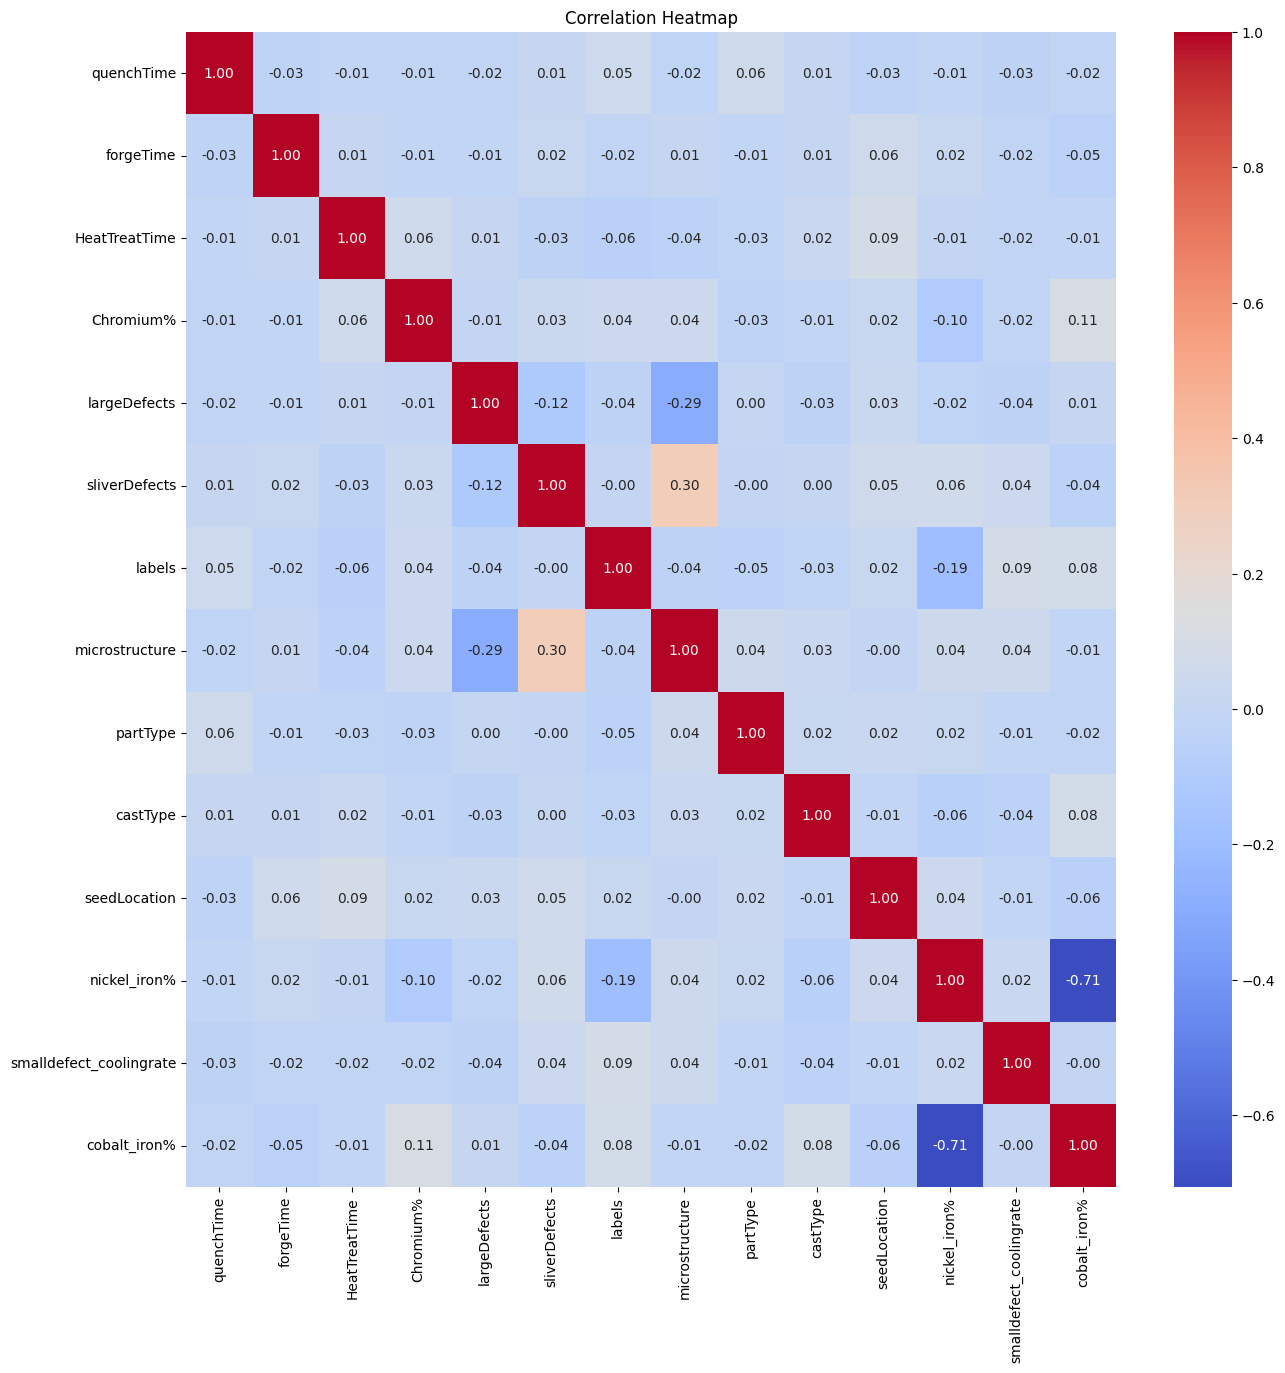

In [ ]:
correlation_matrix = coursework_dataset_copy.corr()
# Set the figure size
plt.figure(figsize=(15, 15))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


In [ ]:
#performing pca on the remaining correlated features
correlated_features = ['nickel_iron%','cobalt_iron%']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['cobalt_iron_nickel%'] = principal_component


correlated_features = ['sliverDefects','largeDefects','microstructure']
#initializing the pca object
pca = PCA(n_components=1)
principal_component = pca.fit_transform(coursework_dataset_copy[correlated_features])
coursework_dataset_copy['sliver_largedefects_microstructure'] = principal_component
coursework_dataset_copy = coursework_dataset_copy.drop(['nickel_iron%','cobalt_iron%','sliverDefects','largeDefects','microstructure'], axis=1)

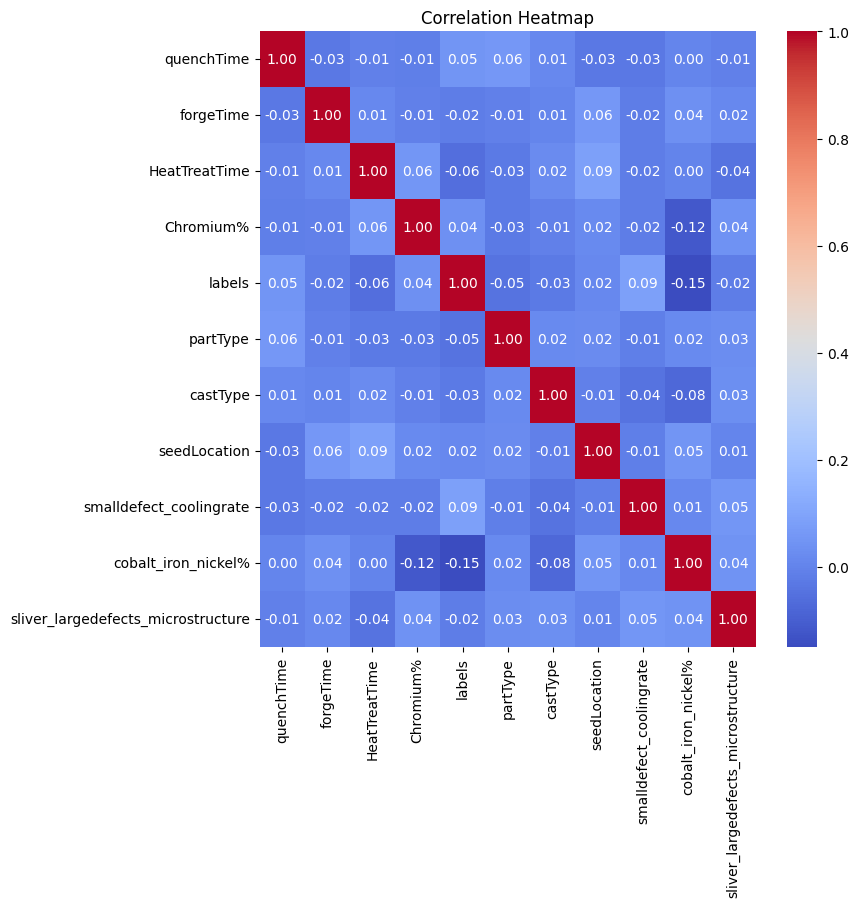

In [ ]:
correlation_matrix = coursework_dataset_copy.corr()
# Set the figure size
plt.figure(figsize=(8, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


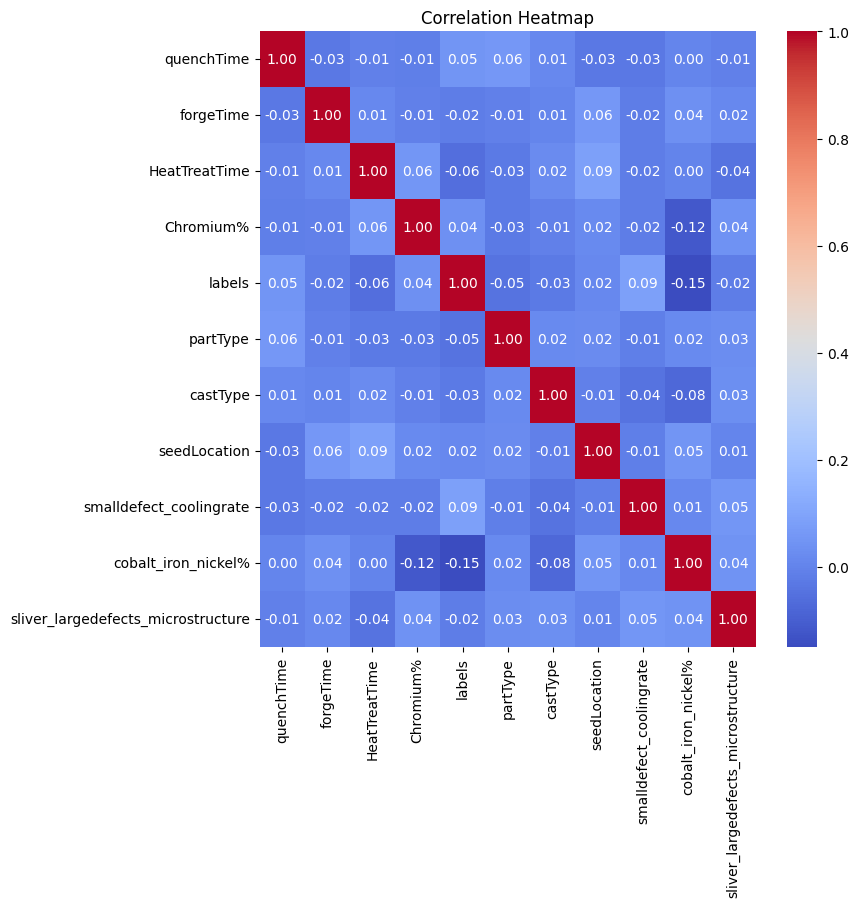

In [ ]:
correlation_matrix = coursework_dataset_copy.corr()
# Set the figure size
plt.figure(figsize=(8, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


selecting the features for classification

In [ ]:
features = coursework_dataset_copy[['quenchTime','forgeTime','Chromium%','partType','seedLocation','smalldefect_coolingrate','cobalt_iron_nickel%','sliver_largedefects_microstructure']]
target = coursework_dataset_copy['labels']

splitting the data into train and test in the ratio 80:20

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.20,random_state=0,stratify=target)

In [ ]:
print("Training data feature shape : " + str(X_train.shape))
print("Training data target shape : " + str(y_train.shape))
print("Testing data feature shape : " + str(X_test.shape))
print("Testing data target shape : " + str(y_test.shape))

Training data feature shape : (800, 8)
Training data target shape : (800,)
Testing data feature shape : (200, 8)
Testing data target shape : (200,)


## **Model 1: Random forest classifier**

In [ ]:
#defining the model
rf = RandomForestClassifier(random_state=42)

#defining the hyperparameters
parameter_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True,False]
}



# Perform GridSearchCV
grid_search= GridSearchCV(rf,
                          parameter_grid_rf,
                          cv=5,
                          scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and cross-validation score
print("Best Parameters:", grid_search.best_params_)


# Use the best model to predict on the validation set
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_test_predictions = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_predictions)
print("Best Random forest model Accuracy:", accuracy)
print("Best random forest model Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_test_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
2160 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Random forest model Accuracy: 0.79
Best random forest model Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       105
           1       0.78      0.78      0.78        95

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



## **Model 2: Gradient Boost**

In [ ]:
#defining the model
xgb = GradientBoostingClassifier(random_state=42)

#defining the hyperparameters
parameter_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features':['sqrt','log2'],
    'loss':['log_loss','exponential']
}



# Perform GridSearchCV
grid_search= GridSearchCV(xgb,
                          parameter_grid_xgb,
                          cv=5,
                          scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and cross-validation score
print("Best Parameters:", grid_search.best_params_)


# Use the best model to predict on the validation set
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_test_predictions = best_xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_predictions)
print("Best Random forest model Accuracy:", accuracy)
print("Best random forest model Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_test_predictions))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Random forest model Accuracy: 0.765
Best random forest model Parameters: {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       105
           1       0.74      0.77      0.76        95

    accuracy                           0.77       200
   macro avg       0.76      0.77      0.76       200
weighted avg       0.77      0.77      0.77       200

